6.2


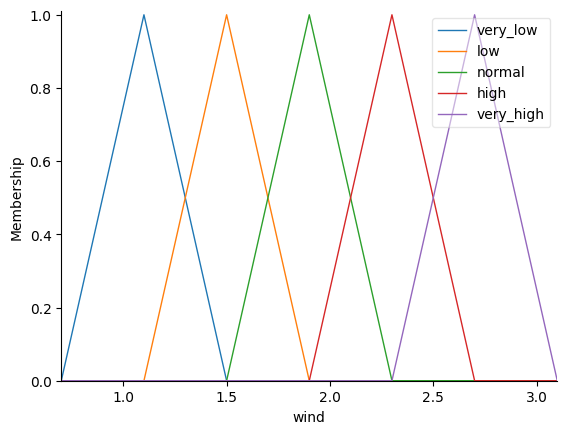

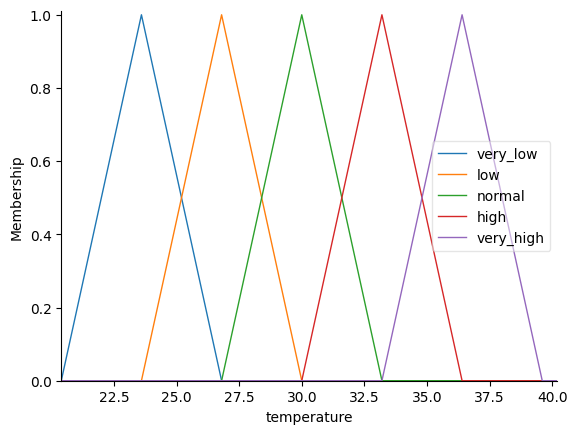

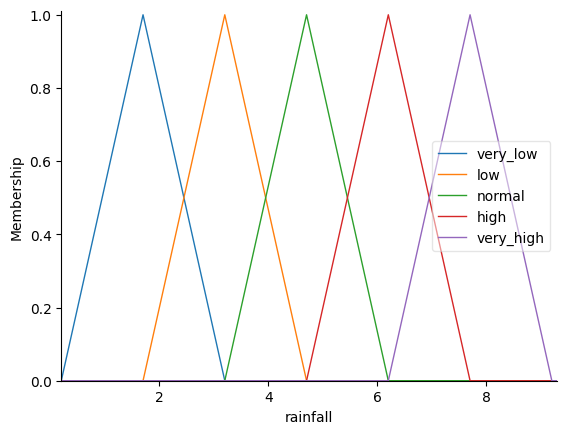

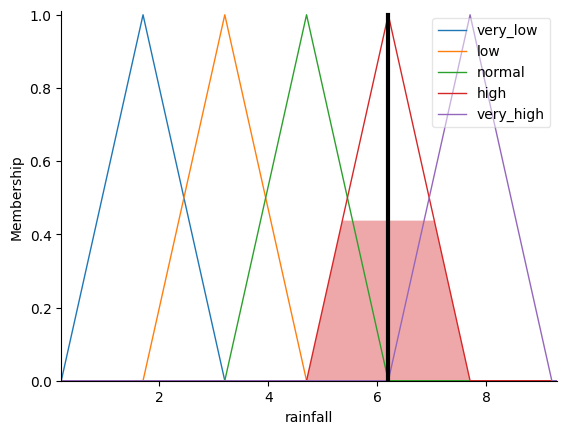

In [ ]:
#VD2.1
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Định nghĩa các biến mờ
wind = ctrl.Antecedent(np.arange(0.7, 3.2, 0.1), 'wind')
temperature = ctrl.Antecedent(np.arange(20.4, 40.3, 0.1), 'temperature')
rainfall = ctrl.Consequent(np.arange(0.2, 9.3, 0.1), 'rainfall')


wind['very_low'] = fuzz.trimf(wind.universe, [0.7, 1.1, 1.5])
wind['low'] = fuzz.trimf(wind.universe, [1.1, 1.5, 1.9])
wind['normal'] = fuzz.trimf(wind.universe, [1.5, 1.9, 2.3])
wind['high'] = fuzz.trimf(wind.universe, [1.9, 2.3, 2.7])
wind['very_high'] = fuzz.trimf(wind.universe, [2.3, 2.7, 3.1])

temperature['very_low'] = fuzz.trimf(temperature.universe, [20.4, 23.6, 26.8])
temperature['low'] = fuzz.trimf(temperature.universe, [23.6, 26.8, 30])
temperature['normal'] = fuzz.trimf(temperature.universe, [26.8, 30, 33.2])
temperature['high'] = fuzz.trimf(temperature.universe, [30, 33.2, 36.4])
temperature['very_high'] = fuzz.trimf(temperature.universe, [33.2, 36.4, 39.6])

rainfall['very_low'] = fuzz.trimf(rainfall.universe, [0.2, 1.7, 3.2])
rainfall['low'] = fuzz.trimf(rainfall.universe, [1.7, 3.2, 4.7])
rainfall['normal'] = fuzz.trimf(rainfall.universe, [3.2, 4.7, 6.2])
rainfall['high'] = fuzz.trimf(rainfall.universe, [4.7, 6.2, 7.7])
rainfall['very_high'] = fuzz.trimf(rainfall.universe, [6.2, 7.7, 9.2])
#Luat
r1 = ctrl.Rule(wind['very_low'] & temperature['very_low'], rainfall['very_low'])
r2 = ctrl.Rule(wind['low'] & temperature['low'], rainfall['low'])
r3 = ctrl.Rule(wind['normal'] & temperature['normal'], rainfall['normal'])
r4 = ctrl.Rule(wind['high'] & temperature['high'], rainfall['high'])
r5 = ctrl.Rule(wind['very_high'] & temperature['very_high'], rainfall['very_high'])
r6 = ctrl.Rule(wind['very_low'] & temperature['normal'], rainfall['low'])



wind.view()
temperature.view()
rainfall.view()
rainfalling_ctrl = ctrl.ControlSystem([r1, r2, r3, r4, r5, r6])
rainfall_sim = ctrl.ControlSystemSimulation(rainfalling_ctrl)

rainfall_sim.input['wind'] = 2.3
rainfall_sim.input['temperature'] = 35


rainfall_sim.compute()


print(rainfall_sim.output['rainfall'])

rainfall.view(sim=rainfall_sim)


In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.6 MB/s eta 0:00:00


82.11640211640211


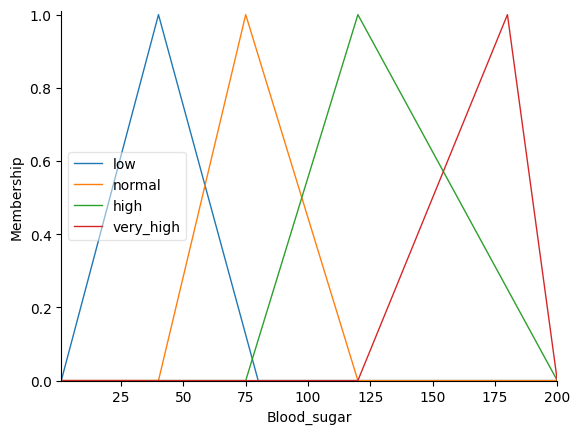

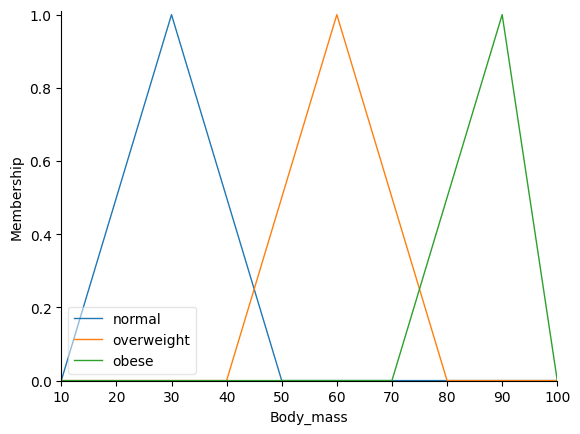

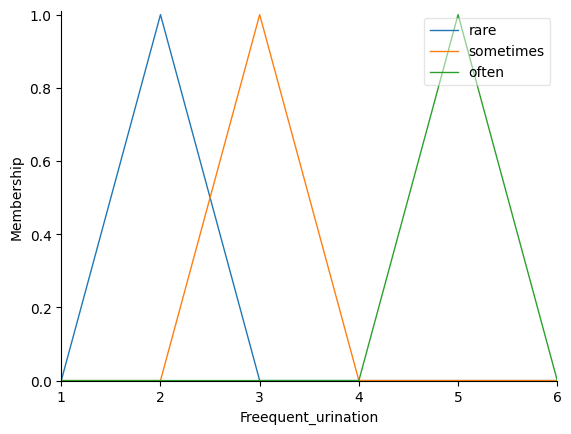

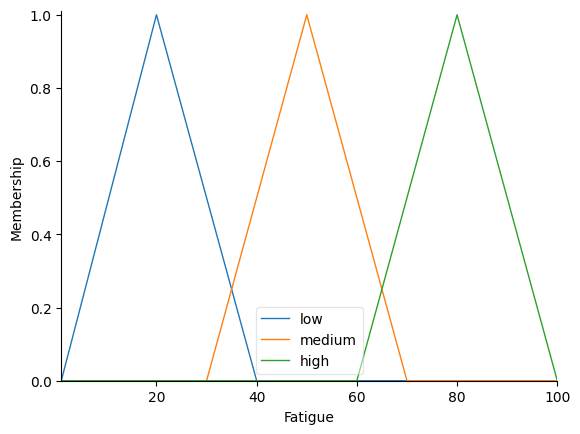

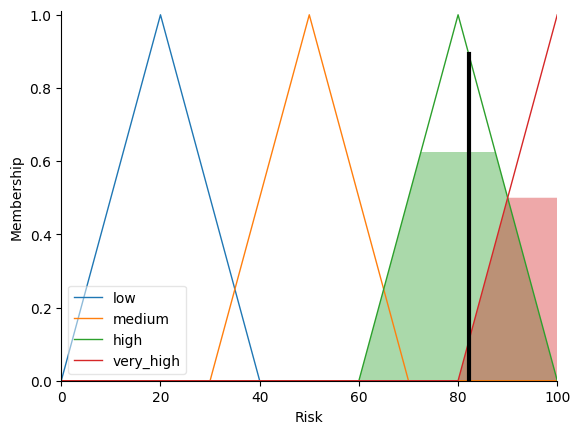

In [ ]:
#VD2.2
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Blood_sugar = ctrl.Antecedent(np.arange(1, 201, 1), 'Blood_sugar')
Body_mass = ctrl.Antecedent(np.arange(10, 101, 1), 'Body_mass')
Frequent_urination = ctrl.Antecedent(np.arange(1, 7, 1), 'Frequent_urination')
Fatigue = ctrl.Antecedent(np.arange(1, 101, 1), 'Fatigue')
Risk = ctrl.Consequent(np.arange(0, 101, 1), 'Risk')

Blood_sugar['low'] = fuzz.trimf(Blood_sugar.universe, [1, 40, 80])
Blood_sugar['normal'] = fuzz.trimf(Blood_sugar.universe, [40, 75, 120])
Blood_sugar['high'] = fuzz.trimf(Blood_sugar.universe, [75, 120, 200])
Blood_sugar['very_high'] = fuzz.trimf(Blood_sugar.universe, [120, 180, 200])

Body_mass['normal'] = fuzz.trimf(Body_mass.universe, [10, 30, 50])
Body_mass['overweight'] = fuzz.trimf(Body_mass.universe, [40, 60, 80])
Body_mass['obese'] = fuzz.trimf(Body_mass.universe, [70, 90, 100])

Frequent_urination['rarely'] = fuzz.trimf(Frequent_urination.universe, [1, 2, 3])
Frequent_urination['sometimes'] = fuzz.trimf(Frequent_urination.universe, [2, 3, 4])
Frequent_urination['frequent'] = fuzz.trimf(Frequent_urination.universe, [4, 5, 6])

Fatigue['low'] = fuzz.trimf(Fatigue.universe, [1, 20, 40])
Fatigue['medium'] = fuzz.trimf(Fatigue.universe, [30, 50, 70])
Fatigue['high'] = fuzz.trimf(Fatigue.universe, [60, 80, 100])

Risk['low'] = fuzz.trimf(Risk.universe, [0, 20, 40])
Risk['medium'] = fuzz.trimf(Risk.universe, [30, 50, 70])
Risk['high'] = fuzz.trimf(Risk.universe, [60, 80, 100])
Risk['very_high'] = fuzz.trimf(Risk.universe, [80, 100, 100])

Blood_sugar.view()
Body_mass.view()
Freequent_urination.view()
Fatigue.view()


r1 = ctrl.Rule(Blood_sugar['very_high'] & Frequent_urination['frequent'], Risk['very_high'])
r2 = ctrl.Rule(Blood_sugar['very_high'] & Frequent_urination['sometimes'], Risk['high'])
r3 = ctrl.Rule(Blood_sugar['high'] & Frequent_urination['frequent'], Risk['high'])
r4 = ctrl.Rule(Blood_sugar['normal'] & Frequent_urination['rarely'], Risk['low'])

r5=ctrl.Rule(Blood_sugar['very_high'] & Body_mass['obese'], Risk['very_high'])
r6=ctrl.Rule(Blood_sugar['very_high'] & Body_mass['overweight'], Risk['high'])
r7=ctrl.Rule(Blood_sugar['high'] & Body_mass['overweight'], Risk['high'])
r8=ctrl.Rule(Blood_sugar['normal'] & Body_mass['normal'], Risk['low'])

r9=ctrl.Rule(Blood_sugar['very_high'] & Fatigue['high'], Risk['very_high'])
r10 = ctrl.Rule(Blood_sugar['high'] & Fatigue['high'], Risk['high'])
r11 = ctrl.Rule(Blood_sugar['high'] & Fatigue['medium'], Risk['medium'])
r12 =  ctrl.Rule(Blood_sugar['normal'] & Fatigue['low'], Risk['low'])



risk_ctrl = ctrl.ControlSystem([r1, r2, r3, r4, r5, r6,r7,r8,r9,r10,r11])
risk_simulation = ctrl.ControlSystemSimulation(risk_ctrl)


risk_simulation.input['Blood_sugar'] = 150
risk_simulation.input['Body_mass'] = 75
risk_simulation.input['Frequent_urination'] = 5
risk_simulation.input['Fatigue'] = 85

risk_simulation.compute()
print(risk_simulation.output['Risk'])
Risk.view(sim=risk_simulation)


3.3513513513513518


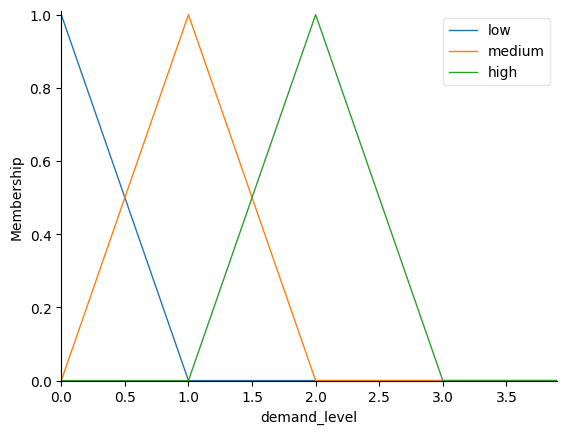

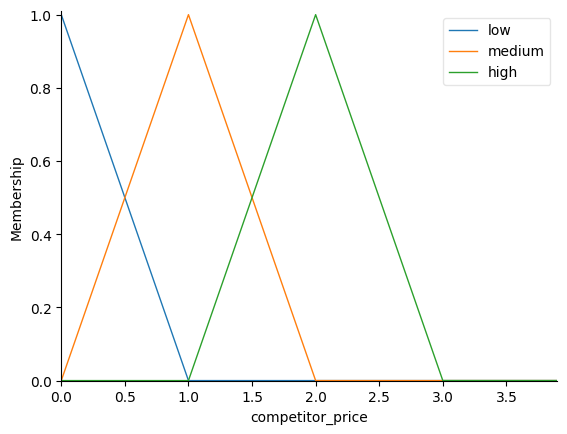

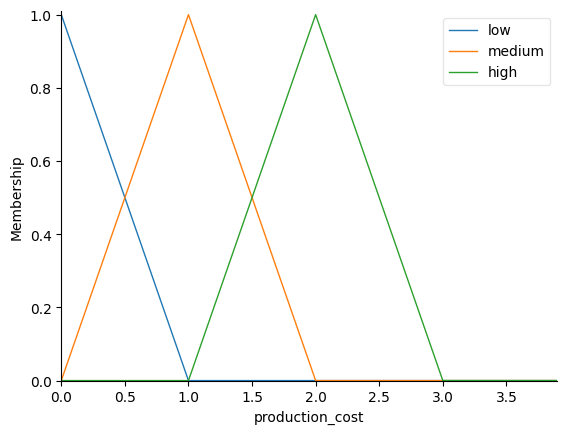

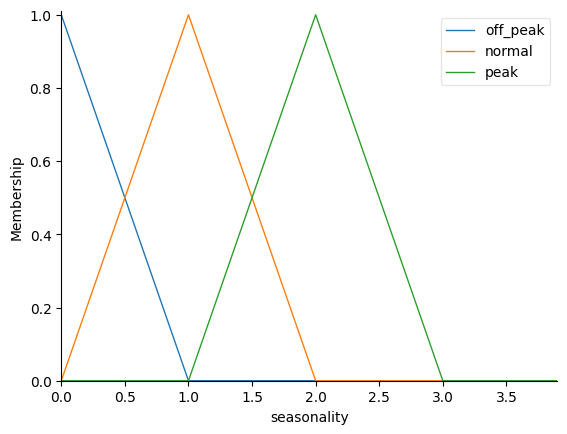

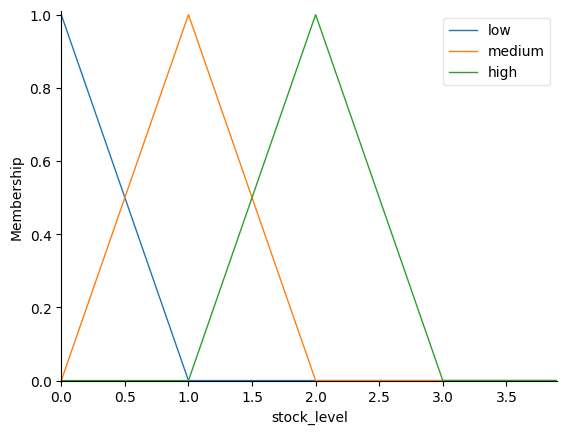

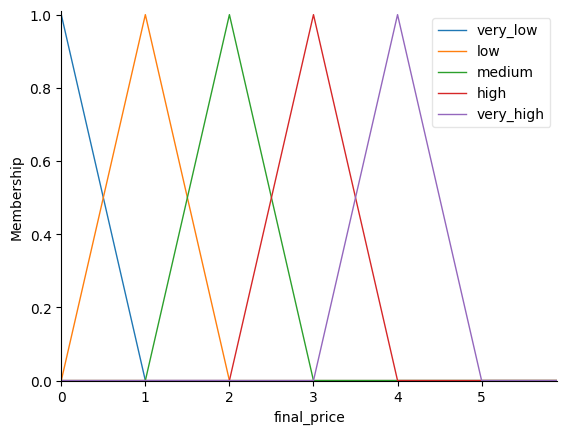

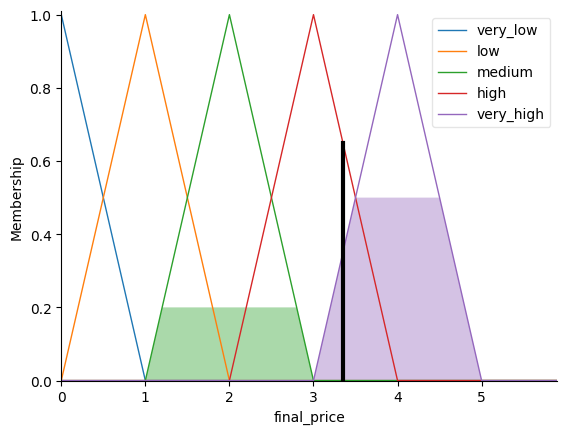

In [8]:
#VD2.3
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
demand_level = ctrl.Antecedent(np.arange(0,4,0.1),'demand_level')
competitor_price = ctrl.Antecedent(np.arange(0,4,0.1),'competitor_price')
production_cost = ctrl.Antecedent(np.arange(0,4,0.1),'production_cost')
seasonality = ctrl.Antecedent(np.arange(0,4,0.1),'seasonality')
stock_level = ctrl.Antecedent(np.arange(0,4,0.1),'stock_level')
final_price = ctrl.Consequent(np.arange(0,6,0.1),'final_price')

demand_level['low'] = fuzz.trimf(demand_level.universe,[0,0,1])
demand_level['medium'] = fuzz.trimf(demand_level.universe,[0,1,2])
demand_level['high'] = fuzz.trimf(demand_level.universe,[1,2,3])
competitor_price['low'] = fuzz.trimf(competitor_price.universe,[0,0,1])
competitor_price['medium'] = fuzz.trimf(competitor_price.universe,[0,1,2])
competitor_price['high'] = fuzz.trimf(competitor_price.universe,[1,2,3])
production_cost['low'] = fuzz.trimf(production_cost.universe,[0,0,1])
production_cost['medium'] = fuzz.trimf(production_cost.universe,[0,1,2])
production_cost['high'] = fuzz.trimf(production_cost.universe,[1,2,3])
seasonality['off_peak'] = fuzz.trimf(seasonality.universe,[0,0,1])
seasonality['normal'] = fuzz.trimf(seasonality.universe,[0,1,2])
seasonality['peak'] = fuzz.trimf(seasonality.universe,[1,2,3])
stock_level['low'] = fuzz.trimf(stock_level.universe,[0,0,1])
stock_level['medium'] = fuzz.trimf(stock_level.universe,[0,1,2])
stock_level['high'] = fuzz.trimf(stock_level.universe,[1,2,3])
final_price['very_low'] = fuzz.trimf(final_price.universe,[0,0,1])
final_price['low'] = fuzz.trimf(final_price.universe,[0,1,2])
final_price['medium'] = fuzz.trimf(final_price.universe,[1,2,3])
final_price['high'] = fuzz.trimf(final_price.universe,[2,3,4])
final_price['very_high'] = fuzz.trimf(final_price.universe,[3,4,5])

demand_level.view()
competitor_price.view()
production_cost.view()
seasonality.view()
stock_level.view()
final_price.view()

rule1 = ctrl.Rule(demand_level['high'] & competitor_price['high'] & stock_level['low'],final_price['very_low'])
rule2 = ctrl.Rule(demand_level['high'] & seasonality['peak'] & stock_level['low'],final_price['very_high'])
rule3 = ctrl.Rule(demand_level['medium'] & production_cost['high'] & stock_level['low'],final_price['very_high'])
rule4 = ctrl.Rule(demand_level['high'] & competitor_price['medium'] & stock_level['medium'],final_price['high'])
rule5 = ctrl.Rule(demand_level['medium'] & competitor_price['high'] & stock_level['low'],final_price['high'])
rule6 = ctrl.Rule(demand_level['high'] & seasonality['peak'] & stock_level['medium'],final_price['high'])
rule7 = ctrl.Rule(demand_level['medium'] & competitor_price['medium'] & stock_level['medium'],final_price['medium'])
rule8 = ctrl.Rule(demand_level['low'] & competitor_price['high'] & stock_level['medium'],final_price['medium'])
rule9 = ctrl.Rule(demand_level['medium'] & production_cost['medium'] & stock_level['medium'],final_price['medium'])
rule10 = ctrl.Rule(demand_level['low'] & competitor_price['low'] & stock_level['high'],final_price['low'])
rule11 = ctrl.Rule(demand_level['medium'] & production_cost['low'] & stock_level['high'],final_price['low'])
rule12 = ctrl.Rule(demand_level['low'] & seasonality['off_peak'] & stock_level['high'],final_price['low'])
rule13 = ctrl.Rule(demand_level['low'] & competitor_price['low'] & stock_level['high'],final_price['very_low'])
rule14 = ctrl.Rule(demand_level['low'] & seasonality['off_peak'] & stock_level['high'],final_price['very_low'])
rule15 = ctrl.Rule(demand_level['medium'] & competitor_price['low'] & stock_level['high'],final_price['very_low'])

final_price_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
final_price_sim = ctrl.ControlSystemSimulation(final_price_ctrl)
final_price_sim.input['demand_level'] = 0.5
final_price_sim.input['competitor_price'] = 0.8
final_price_sim.input['production_cost'] = 1.5
final_price_sim.input['seasonality'] = 2
final_price_sim.input['stock_level'] = 0.2
final_price_sim.compute()
print(final_price_sim.output['final_price'])
final_price.view(sim=final_price_sim)

80.00000000000004
80.00000000000004


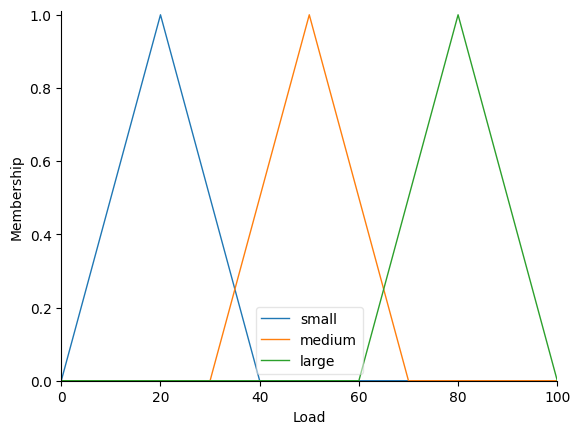

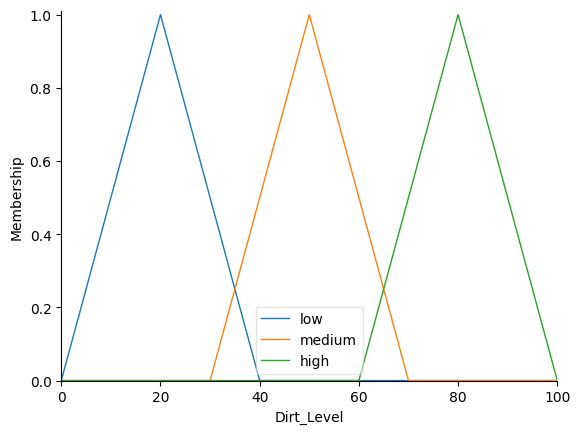

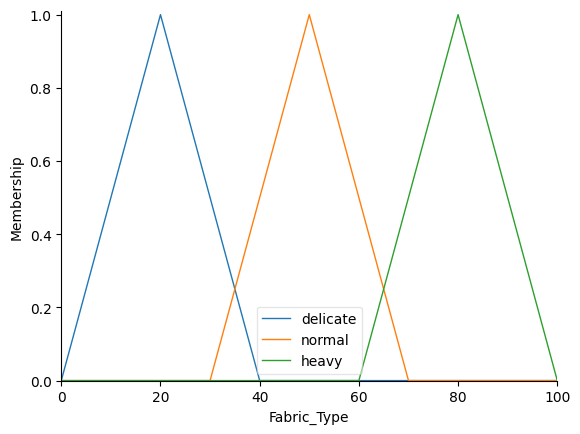

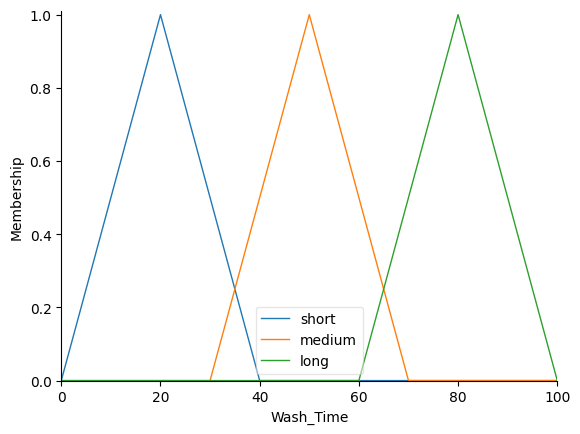

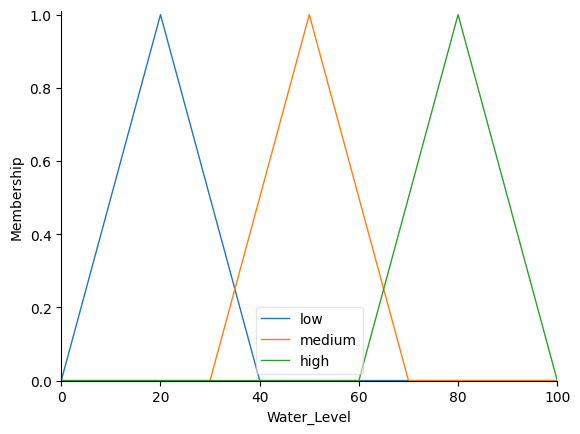

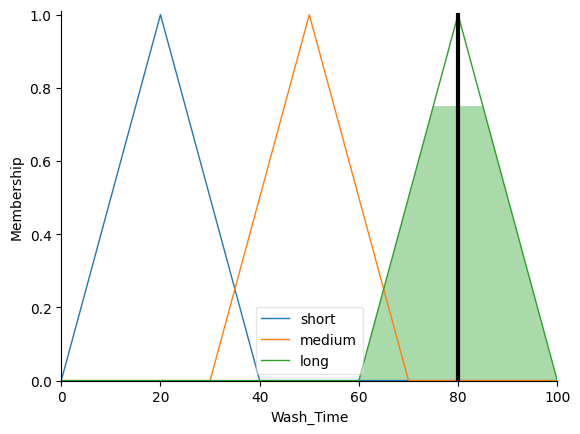

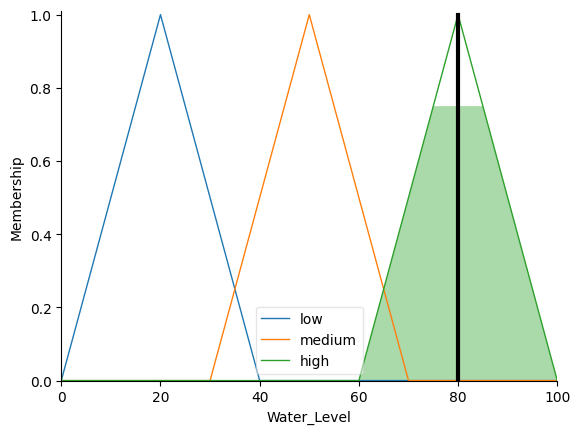

In [ ]:
#VD2.4
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


Load = ctrl.Antecedent(np.arange(0, 101, 1), 'Load')
Dirt_Level = ctrl.Antecedent(np.arange(0, 101, 1), 'Dirt_Level')
Fabric_Type = ctrl.Antecedent(np.arange(0, 101, 1), 'Fabric_Type')


Wash_Time = ctrl.Consequent(np.arange(0, 101, 1), 'Wash_Time')
Water_Level = ctrl.Consequent(np.arange(0, 101, 1), 'Water_Level')


Load['small'] = fuzz.trimf(Load.universe, [0, 20, 40])
Load['medium'] = fuzz.trimf(Load.universe, [30, 50, 70])
Load['large'] = fuzz.trimf(Load.universe, [60, 80, 100])

Dirt_Level['low'] = fuzz.trimf(Dirt_Level.universe, [0, 20, 40])
Dirt_Level['medium'] = fuzz.trimf(Dirt_Level.universe, [30, 50, 70])
Dirt_Level['high'] = fuzz.trimf(Dirt_Level.universe, [60, 80, 100])

Fabric_Type['delicate'] = fuzz.trimf(Fabric_Type.universe, [0, 20, 40])
Fabric_Type['normal'] = fuzz.trimf(Fabric_Type.universe, [30, 50, 70])
Fabric_Type['heavy'] = fuzz.trimf(Fabric_Type.universe, [60, 80, 100])

Wash_Time['short'] = fuzz.trimf(Wash_Time.universe, [0, 20, 40])
Wash_Time['medium'] = fuzz.trimf(Wash_Time.universe, [30, 50, 70])
Wash_Time['long'] = fuzz.trimf(Wash_Time.universe, [60, 80, 100])

Water_Level['low'] = fuzz.trimf(Water_Level.universe, [0, 20, 40])
Water_Level['medium'] = fuzz.trimf(Water_Level.universe, [30, 50, 70])
Water_Level['high'] = fuzz.trimf(Water_Level.universe, [60, 80, 100])

Load.view()
Dirt_Level.view()
Fabric_Type.view()
Wash_Time.view()
Water_Level.view()


r1 = ctrl.Rule(Load['small'] & Dirt_Level['low'], (Wash_Time['short'], Water_Level['low']))
r2 = ctrl.Rule(Load['small'] & Dirt_Level['medium'], (Wash_Time['medium'], Water_Level['medium']))
r3 = ctrl.Rule(Load['small'] & Dirt_Level['high'], (Wash_Time['long'], Water_Level['medium']))
r4 = ctrl.Rule(Load['medium'] & Dirt_Level['low'], (Wash_Time['medium'], Water_Level['medium']))
r5 = ctrl.Rule(Load['medium'] & Dirt_Level['medium'], (Wash_Time['long'], Water_Level['medium']))
r6 = ctrl.Rule(Load['medium'] & Dirt_Level['high'], (Wash_Time['long'], Water_Level['high']))
r7 = ctrl.Rule(Load['large'] & Dirt_Level['low'], (Wash_Time['medium'], Water_Level['high']))
r8 = ctrl.Rule(Load['large'] & Dirt_Level['medium'], (Wash_Time['long'], Water_Level['high']))
r9 = ctrl.Rule(Load['large'] & Dirt_Level['high'], (Wash_Time['long'], Water_Level['high']))

# Luật dựa trên loại vải
r10 = ctrl.Rule(Fabric_Type['delicate'], (Wash_Time['short'], Water_Level['low']))
r11 = ctrl.Rule(Fabric_Type['normal'], (Wash_Time['medium'], Water_Level['medium']))
r12 = ctrl.Rule(Fabric_Type['heavy'], (Wash_Time['long'], Water_Level['high']))

# Luật kết hợp tất cả các yếu tố
r13 = ctrl.Rule(Load['large'] & Dirt_Level['high'] & Fabric_Type['heavy'], (Wash_Time['long'], Water_Level['high']))
r14 = ctrl.Rule(Load['small'] & Dirt_Level['low'] & Fabric_Type['delicate'], (Wash_Time['short'], Water_Level['low']))
ru15 = ctrl.Rule(Load['medium'] & Dirt_Level['medium'] & Fabric_Type['normal'], (Wash_Time['medium'], Water_Level['medium']))

washing_ctrl = ctrl.ControlSystem([r1, r2, r3, r4, r5, r6, r7, r8, r9, r10, r11, r12, r13, r14, r15])
washing_sim = ctrl.ControlSystemSimulation(washing_ctrl)

washing_sim.input['Load'] = 50
washing_sim.input['Dirt_Level'] = 75
washing_sim.input['Fabric_Type'] = 90
washing_sim.compute()


print(washing_sim.output['Wash_Time'])
print(washing_sim.output['Water_Level'])

Wash_Time.view(sim=washing_sim)
Water_Level.view(sim=washing_sim)

52.67973856209153
71.08290660814438


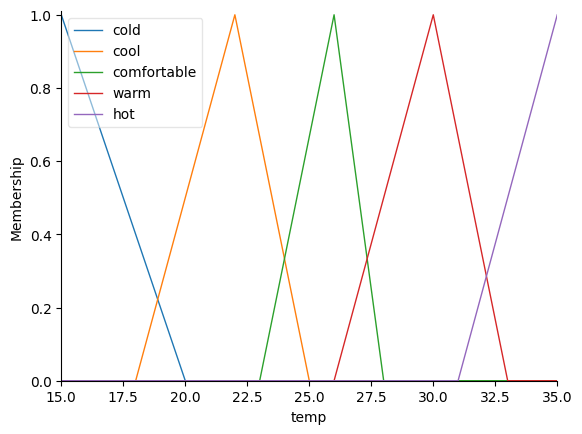

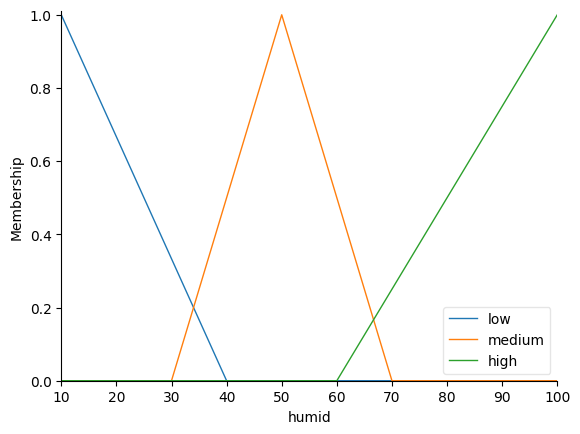

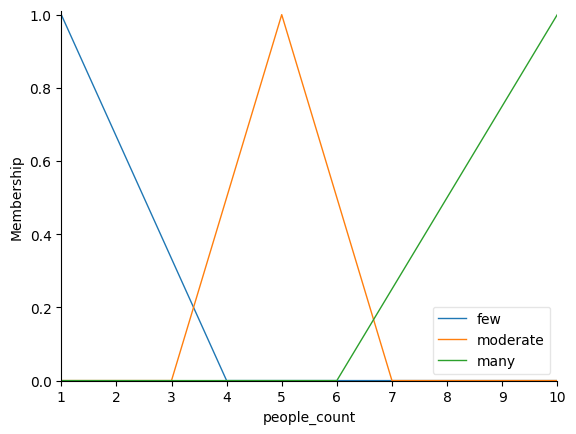

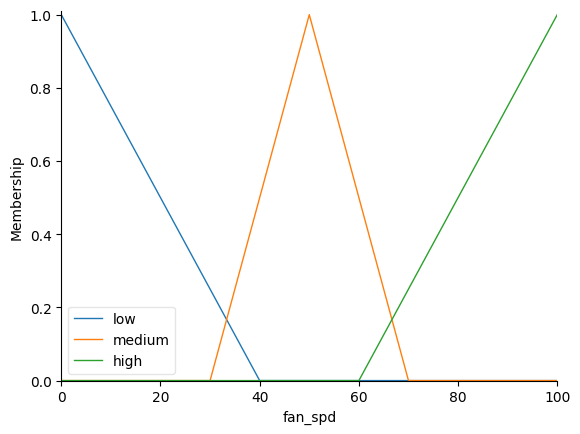

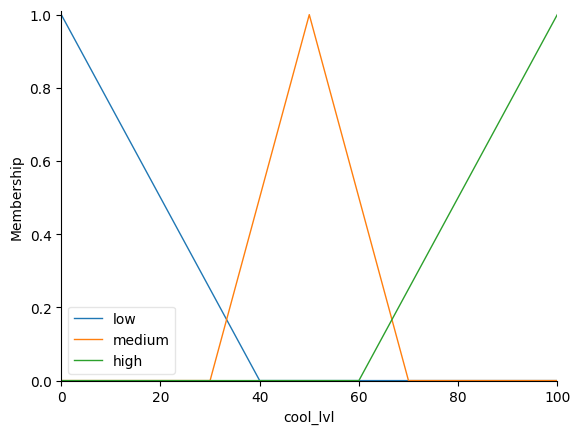

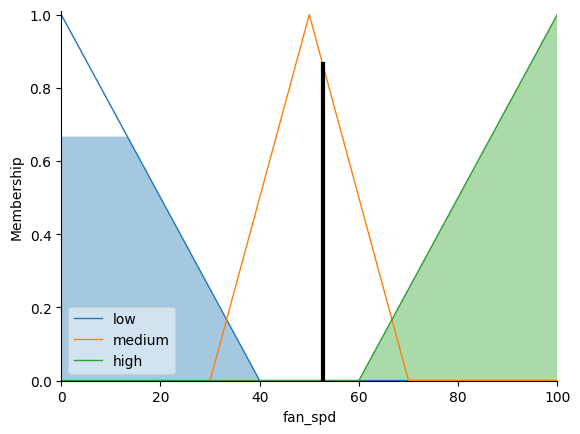

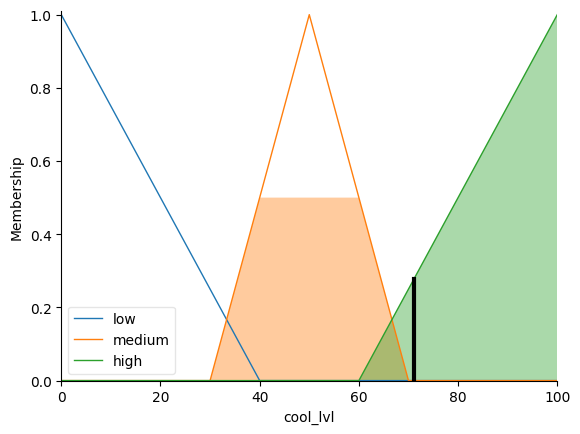

In [ ]:
#VD2.5
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
temp = ctrl.Antecedent(np.arange(15, 36, 1), 'temp')  #  (15-35°C)
humid = ctrl.Antecedent(np.arange(10, 101, 1), 'humid')  #  (10-100%)
people_count = ctrl.Antecedent(np.arange(1, 11, 1), 'people_count')  # Số người (1-10)
fan_spd = ctrl.Consequent(np.arange(0, 101, 1), 'fan_spd')  #  (0-100%)
cool_lvl = ctrl.Consequent(np.arange(0, 101, 1), 'cool_lvl')  # (0-100%)

temp['cold'] = fuzz.trimf(temp.universe, [15, 15, 20])
temp['cool'] = fuzz.trimf(temp.universe, [18, 22, 25])
temp['comfortable'] = fuzz.trimf(temp.universe, [23, 26, 28])
temp['warm'] = fuzz.trimf(temp.universe, [26, 30, 33])
temp['hot'] = fuzz.trimf(temp.universe, [31, 35, 35])


humid['low'] = fuzz.trimf(humid.universe, [10, 10, 40])
humid['medium'] = fuzz.trimf(humid.universe, [30, 50, 70])
humid['high'] = fuzz.trimf(humid.universe, [60, 100, 100])

people_count['few'] = fuzz.trimf(people_count.universe, [1, 1, 4])
people_count['moderate'] = fuzz.trimf(people_count.universe, [3, 5, 7])
people_count['many'] = fuzz.trimf(people_count.universe, [6, 10, 10])

fan_spd['low'] = fuzz.trimf(fan_spd.universe, [0, 0, 40])
fan_spd['medium'] = fuzz.trimf(fan_spd.universe, [30, 50, 70])
fan_spd['high'] = fuzz.trimf(fan_spd.universe, [60, 100, 100])

cool_lvl['low'] = fuzz.trimf(cool_lvl.universe, [0, 0, 40])
cool_lvl['medium'] = fuzz.trimf(cool_lvl.universe, [30, 50, 70])
cool_lvl['high'] = fuzz.trimf(cool_lvl.universe, [60, 100, 100])

temp.view()
humid.view()
people_count.view()
fan_spd.view()
cool_lvl.view()


r1 = ctrl.Rule(temp['cold'], [fan_spd['low'], cool_lvl['low']])
r2 = ctrl.Rule(temp['cool'], [fan_spd['low'], cool_lvl['low']])
r3 = ctrl.Rule(temp['comfortable'], [fan_spd['medium'], cool_lvl['medium']])
r4 = ctrl.Rule(temp['warm'], [fan_spd['high'], cool_lvl['high']])
r5 = ctrl.Rule(temp['hot'], [fan_spd['high'], cool_lvl['high']])

r6 = ctrl.Rule(humid['low'], cool_lvl['low'])
r7 = ctrl.Rule(humid['medium'], cool_lvl['medium'])
r8 = ctrl.Rule(humid['high'], cool_lvl['high'])

r9 = ctrl.Rule(people_count['few'], fan_spd['low'])
r10 = ctrl.Rule(people_count['moderate'], fan_spd['medium'])
r11 = ctrl.Rule(people_count['many'], fan_spd['high'])


ac_ctrl = ctrl.ControlSystem([r1, r2, r3, r4, r5, r6, r7, r8, r9, r10,r11])
ac_simulation = ctrl.ControlSystemSimulation(ac_ctrl)


ac_simulation.input['temp'] = 30
ac_simulation.input['humid'] = 60
ac_simulation.input['people_count'] = 2


ac_simulation.compute()

print(ac_simulation.output['fan_spd'])
print(ac_simulation.output['cool_lvl'])

fan_spd.view(sim=ac_simulation)
cool_lvl.view(sim=ac_simulation)


49.93624954226175
27.739130434782602


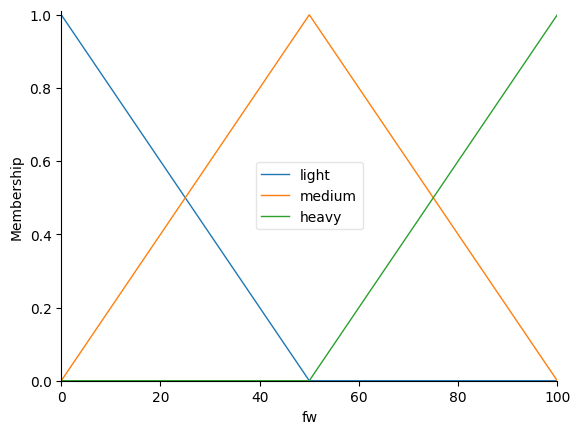

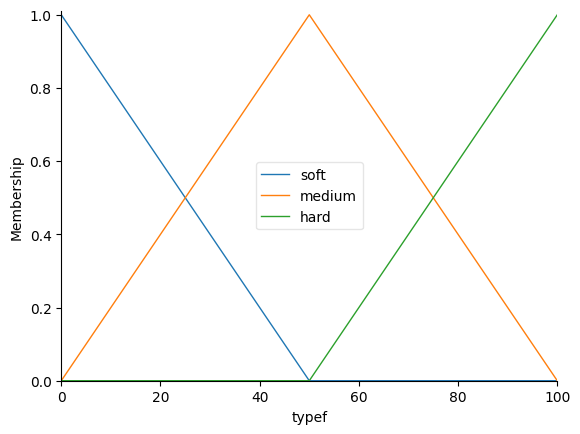

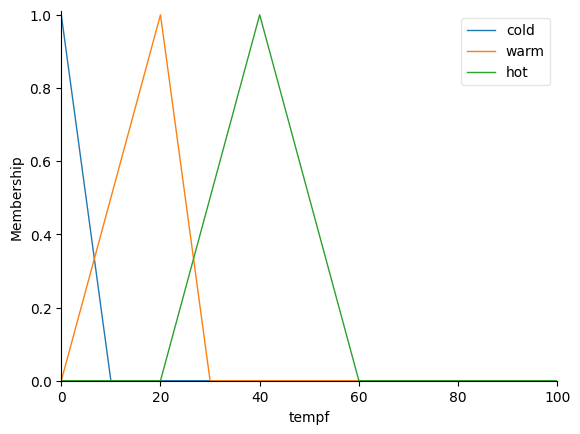

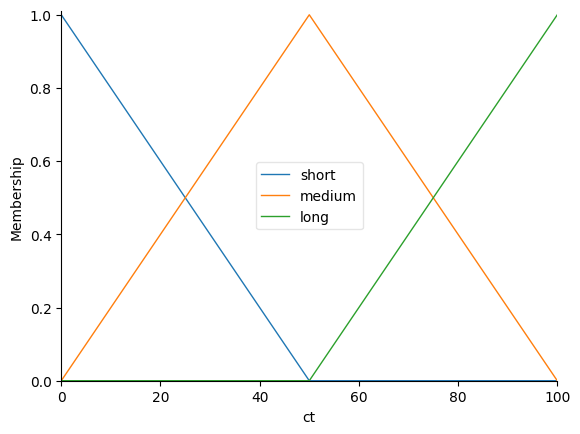

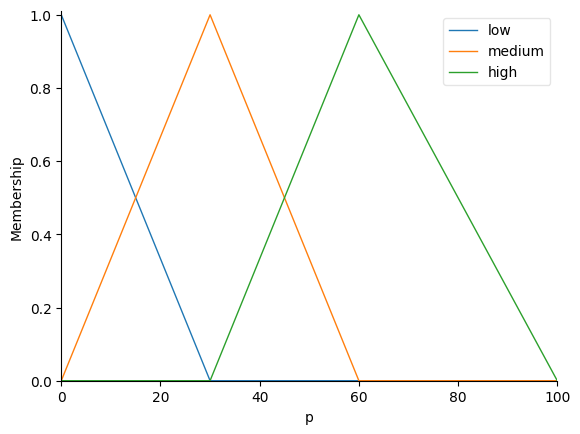

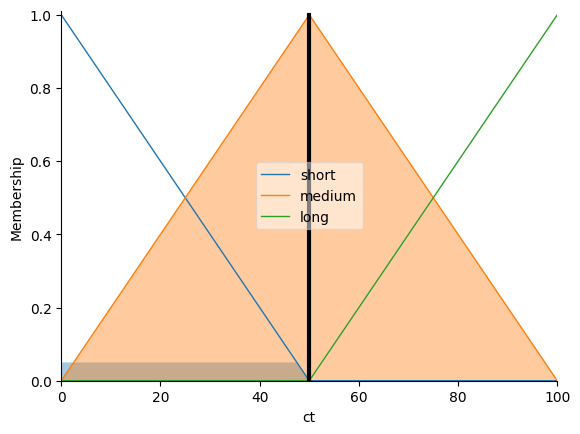

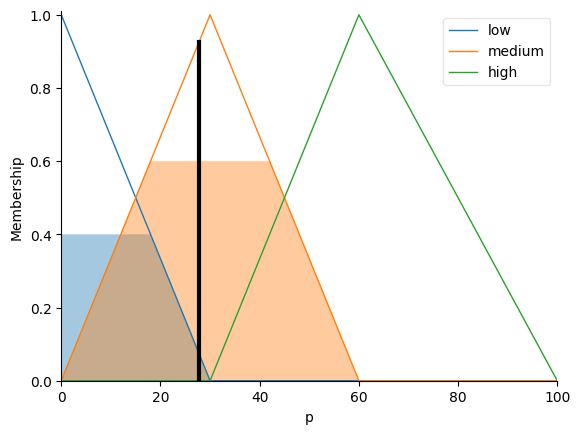

In [ ]:
#VD2.6
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
fw = ctrl.Antecedent(np.arange(0, 101, 1), 'fw')
typef = ctrl.Antecedent(np.arange(0, 101, 1), 'typef')
tempf = ctrl.Antecedent(np.arange(0, 101, 1), 'tempf')

ct = ctrl.Consequent(np.arange(0, 101, 1), 'ct')
p = ctrl.Consequent(np.arange(0, 101, 1), 'p')


fw['light'] = fuzz.trimf(fw.universe, [0, 0, 50])
fw['medium'] = fuzz.trimf(fw.universe, [0, 50, 100])
fw['heavy'] = fuzz.trimf(fw.universe, [50, 100, 100])

typef['soft'] = fuzz.trimf(typef.universe, [0, 0, 50])
typef['medium'] = fuzz.trimf(typef.universe, [0, 50, 100])
typef['hard'] = fuzz.trimf(typef.universe, [50, 100, 100])

tempf['cold'] = fuzz.trimf(tempf.universe, [0, 0, 10])
tempf['warm'] = fuzz.trimf(tempf.universe, [0, 20, 30])
tempf['hot'] = fuzz.trimf(tempf.universe, [20, 40, 60])

ct['short'] = fuzz.trimf(ct.universe, [0, 0, 50])
ct['medium'] = fuzz.trimf(ct.universe, [0, 50, 100])
ct['long'] = fuzz.trimf(ct.universe, [50, 100, 100])

p['low'] = fuzz.trimf(p.universe, [0, 0, 30])
p['medium'] = fuzz.trimf(p.universe, [0, 30, 60])
p['high'] = fuzz.trimf(p.universe, [30, 60, 100])

fw.view()
typef.view()
tempf.view()
ct.view()
p.view()

r1 = ctrl.Rule(fw['light'], ct['short'])
r2 = ctrl.Rule(fw['medium'], ct['medium'])
r3 = ctrl.Rule(fw['heavy'], ct['long'])

r4 = ctrl.Rule(typef['soft'], p['low'])
r5 = ctrl.Rule(typef['medium'], p['medium'])
r6 = ctrl.Rule(typef['hard'], p['high'])

r7 = ctrl.Rule(tempf['cold'], ct['long'])
r8 = ctrl.Rule(tempf['warm'], ct['medium'])
r9 = ctrl.Rule(tempf['hot'], ct['short'])

r10 = ctrl.Rule(fw['heavy'] & typef['hard'] & tempf['cold'], ct['long'])
r10b = ctrl.Rule(fw['heavy'] & typef['hard'] & tempf['cold'], p['high'])

r11 = ctrl.Rule(fw['medium'] & typef['soft'] & tempf['warm'], ct['medium'])
r11b = ctrl.Rule(fw['medium'] & typef['soft'] & tempf['warm'], p['low'])

r12 = ctrl.Rule(fw['light'] & typef['medium'] & tempf['hot'], ct['short'])
r12b = ctrl.Rule(fw['light'] & typef['medium'] & tempf['hot'], p['medium'])

microwave_ctrl = ctrl.ControlSystem([r1, r2, r3, r4, r5, r6, r7, r8, r9, r10, r10b, r11, r11b, r12, r12b])
microwave = ctrl.ControlSystemSimulation(microwave_ctrl)


microwave.input['fw'] = 50
microwave.input['typef'] = 30
microwave.input['tempf'] = 21


microwave.compute()

print(microwave.output['ct'])
print(microwave.output['p'])

ct.view(sim=microwave)
p.view(sim=microwave)


1.2487858719646803
60.00000000000003


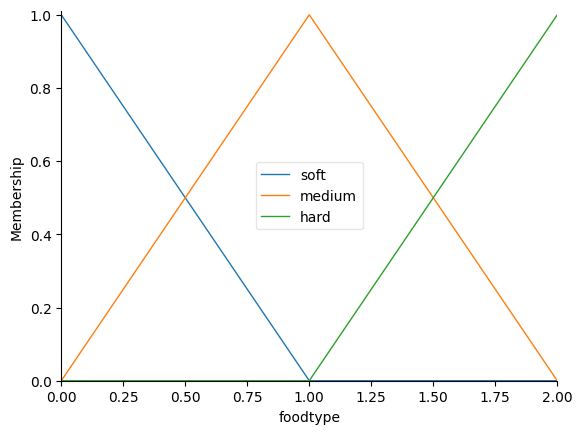

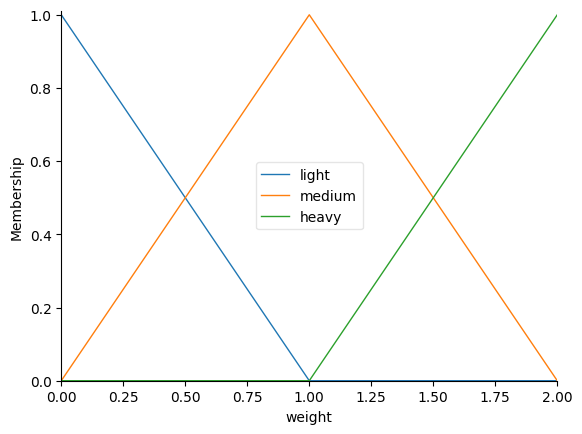

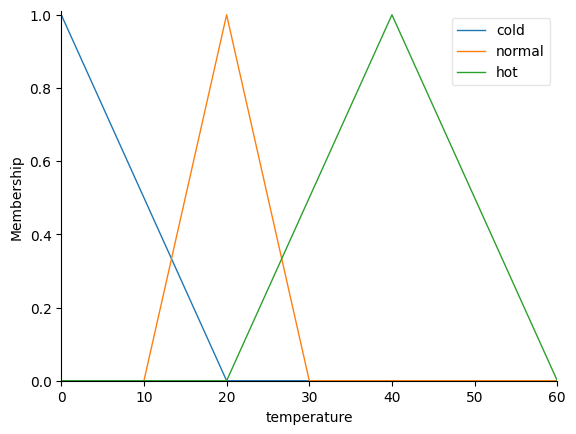

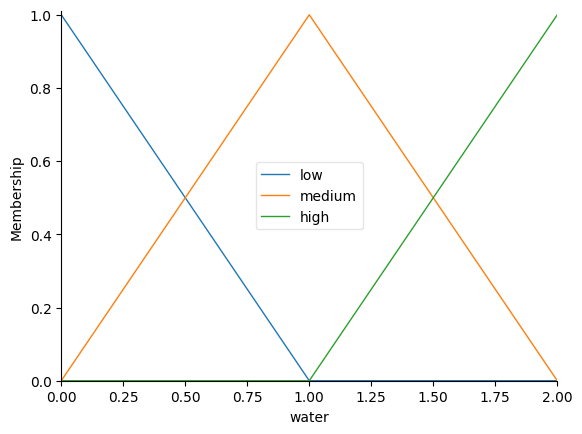

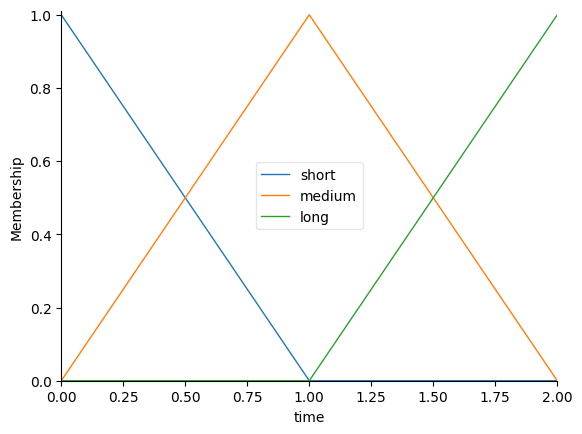

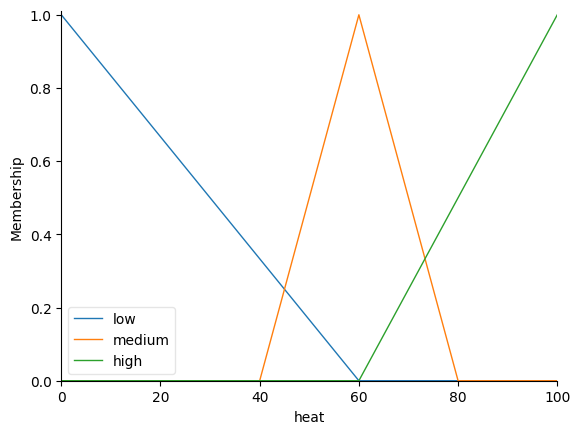

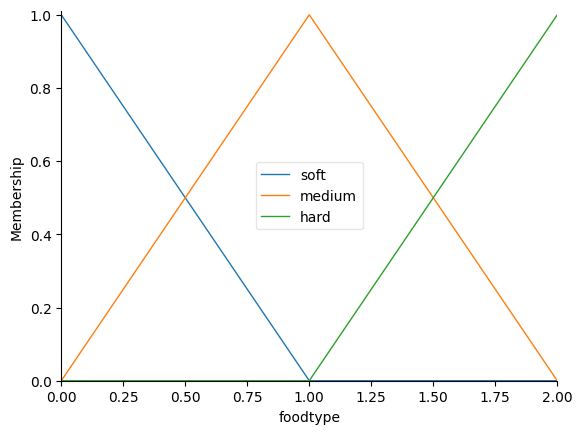

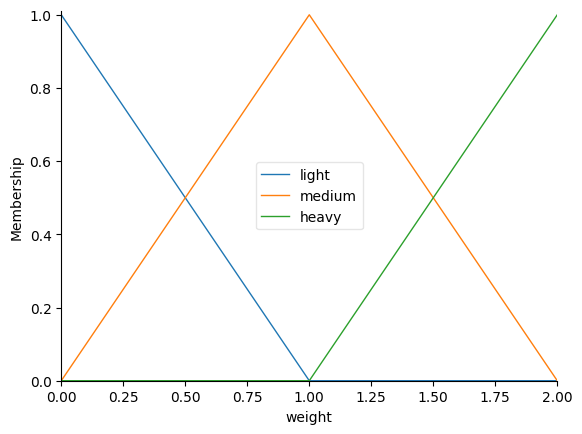

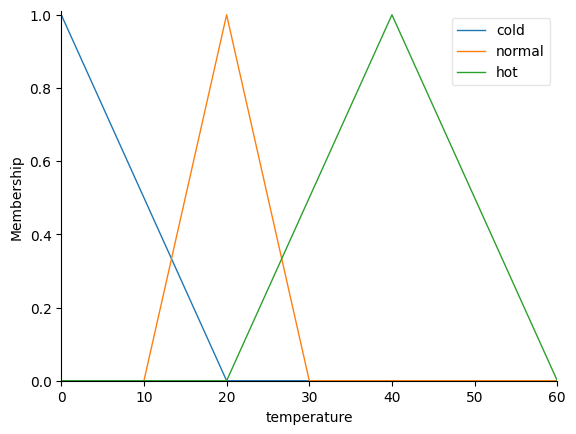

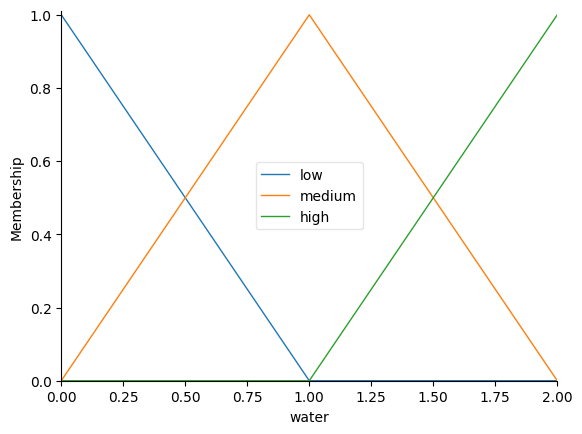

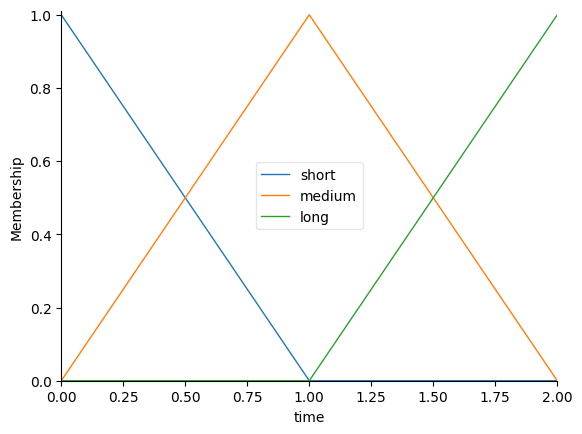

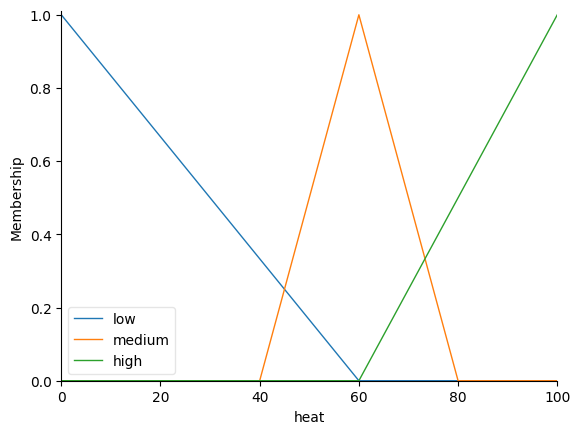

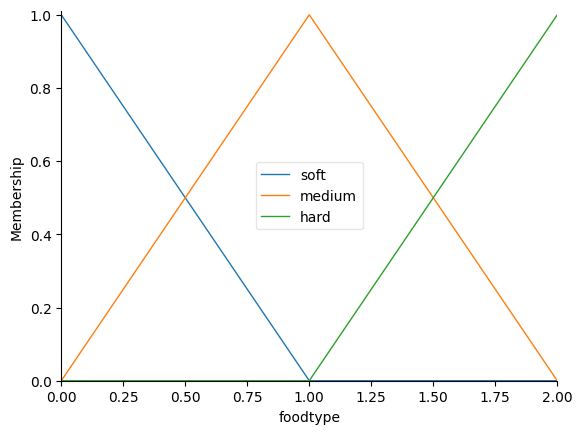

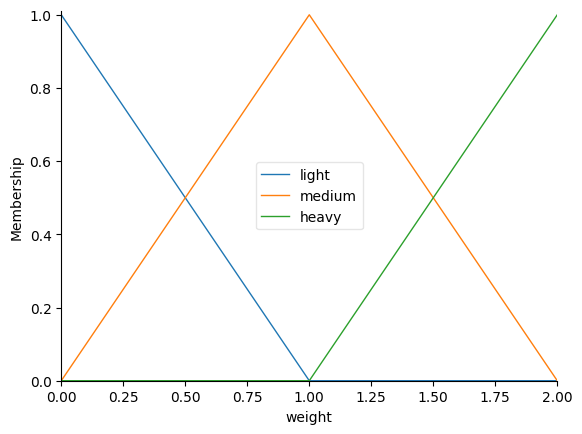

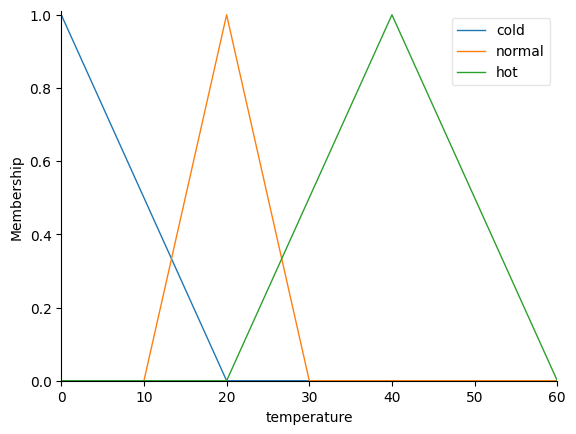

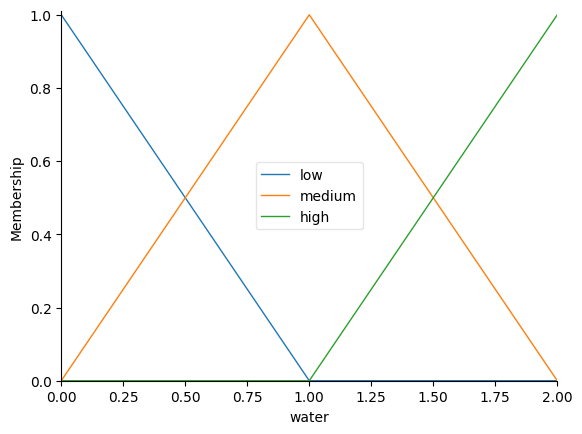

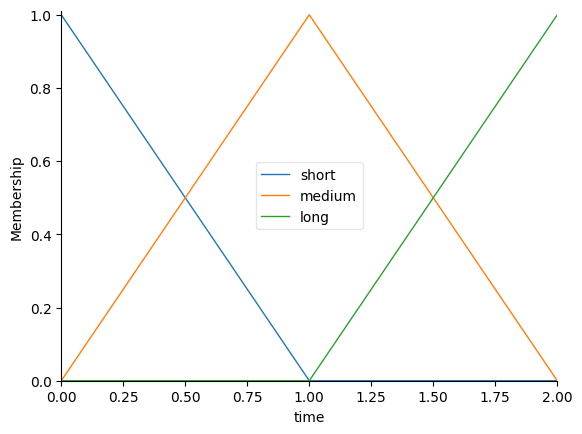

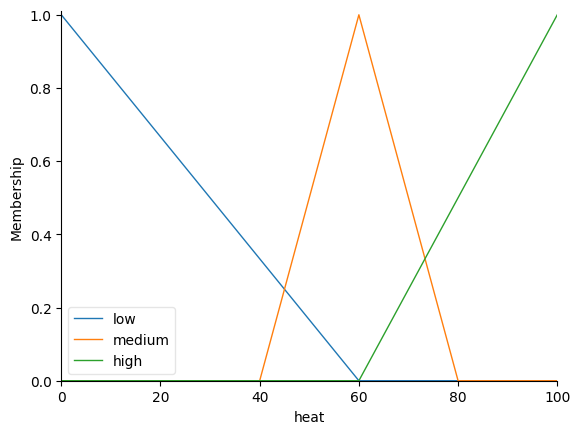

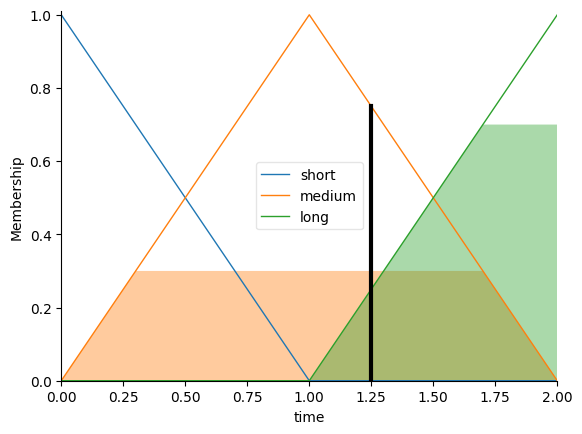

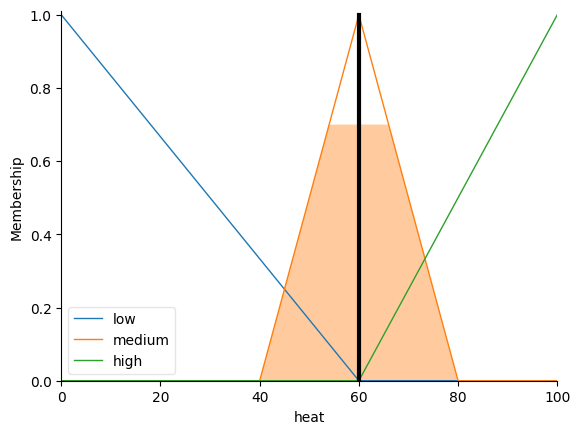

In [ ]:
#VD2.7
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

foodtype = ctrl.Antecedent(np.arange(0, 2.1, 0.1), 'foodtype')
weight = ctrl.Antecedent(np.arange(0, 2.1, 0.1), 'weight')
temperature = ctrl.Antecedent(np.arange(0, 61, 1), 'temperature')
water = ctrl.Antecedent(np.arange(0, 2.1, 0.1), 'water')
time = ctrl.Consequent(np.arange(0, 2.1, 0.1), 'time')
heat = ctrl.Consequent(np.arange(0, 101, 1), 'heat')

foodtype['soft'] = fuzz.trimf(foodtype.universe, [0, 0, 1])
foodtype['medium'] = fuzz.trimf(foodtype.universe, [0, 1, 2])
foodtype['hard'] = fuzz.trimf(foodtype.universe, [1, 2, 2])
weight['light'] = fuzz.trimf(weight.universe, [0, 0, 1])
weight['medium'] = fuzz.trimf(weight.universe, [0, 1, 2])
weight['heavy'] = fuzz.trimf(weight.universe, [1, 2, 2])
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['normal'] = fuzz.trimf(temperature.universe, [10, 20, 30])
temperature['hot'] = fuzz.trimf(temperature.universe, [20, 40, 60])
water['low'] = fuzz.trimf(water.universe, [0, 0, 1])
water['medium'] = fuzz.trimf(water.universe, [0, 1, 2])
water['high'] = fuzz.trimf(water.universe, [1, 2, 2])
time['short'] = fuzz.trimf(time.universe, [0, 0, 1])
time['medium'] = fuzz.trimf(time.universe, [0, 1, 2])
time['long'] = fuzz.trimf(time.universe, [1, 2, 2])
heat['low'] = fuzz.trimf(heat.universe, [0, 0, 60])
heat['medium'] = fuzz.trimf(heat.universe, [40, 60, 80])
heat['high'] = fuzz.trimf(heat.universe, [60, 100, 100])

foodtype.view()
weight.view()
temperature.view()
water.view()
time.view()
heat.view()
water = ctrl.Antecedent (np.arange(0,2.1,0.1),'water')
time = ctrl.Consequent (np.arange(0, 2.1, 0.1),'time')
heat = ctrl.Consequent (np.arange (0,101,1), 'heat')

foodtype[ 'soft']=fuzz.trimf (foodtype.universe, [0, 0, 1])
foodtype ['medium' ]=fuzz.trimf (foodtype.universe, [0, 1, 2])
foodtype[ 'hard' ]=fuzz.trimf (foodtype.universe, [1, 2, 2])
weight ['light']=fuzz.trimf(weight.universe, [0, 0, 1])
weight [ 'medium']=fuzz.trimf(weight.universe, [0, 1, 2])
weight [ 'heavy']=fuzz.trimf(weight.universe, [1, 2, 2]) #Corrected Value
temperature[ 'cold']=fuzz.trimf (temperature.universe, [0, 0, 20])
temperature ['normal']=fuzz.trimf(temperature.universe, [10, 20,30])
temperature[ 'hot']=fuzz.trimf (temperature.universe, [20, 40, 60])
water ['low']=fuzz.trimf(water.universe, [0, 0, 1])
water ['medium']=fuzz.trimf(water.universe, [0, 1, 2])
water ['high' ]=fuzz.trimf (water.universe, [1, 2, 2])
time ['short' ]=fuzz.trimf(time.universe, [0, 0, 1])
time ['medium']=fuzz.trimf (time.universe, [0, 1, 2])
time[ 'long']=fuzz.trimf(time.universe, [1, 2, 2])
heat ['low']=fuzz.trimf(heat.universe, [0, 0, 60])
heat ['medium' ]=fuzz.trimf(heat.universe, [40, 60,80])
heat ['high']=fuzz.trimf (heat.universe, [60, 100, 100])



foodtype.view()
weight.view()
temperature.view()
water.view()
time.view()
heat.view()

rule1=ctrl.Rule(foodtype['soft']&weight['light'], time['short'])
rule2=ctrl.Rule(foodtype['soft']&weight['heavy'], time['medium'])
rule3=ctrl.Rule(temperature['cold']&water['low'], time['long'])
rule4=ctrl.Rule(temperature['cold']&water['medium'], time['medium'])
rule5=ctrl.Rule(temperature['normal']&water['low'], (time['medium'], heat['low']))
rule6=ctrl.Rule(temperature['normal']&water['medium'], (time['medium'], heat['medium']))
rule7=ctrl.Rule(temperature['normal']&water['high'], (time['long'], heat['medium']))
rule8=ctrl.Rule(temperature['hot']&water['low'], (time['long'], heat['high']))

m_ctrl=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
m_sim=ctrl.ControlSystemSimulation(m_ctrl)

m_sim.input['foodtype']=1.5
m_sim.input['weight']=1.2
m_sim.input['temperature']=20
m_sim.input['water']=1.7
m_sim.compute()
print(m_sim.output['time'])
print(m_sim.output['heat'])
time.view(sim=m_sim)
heat.view(sim=m_sim)


88.18511796733216
85.19147519147515
85.81699346405226


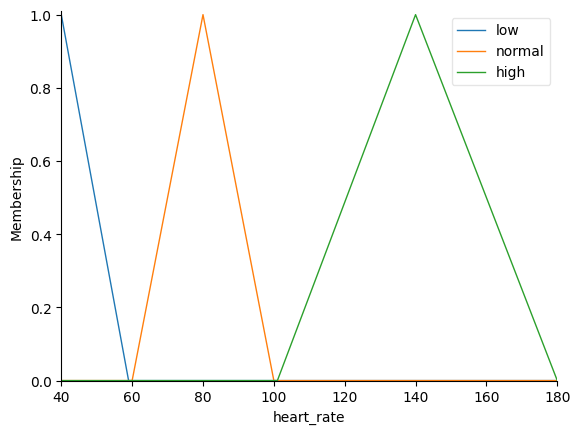

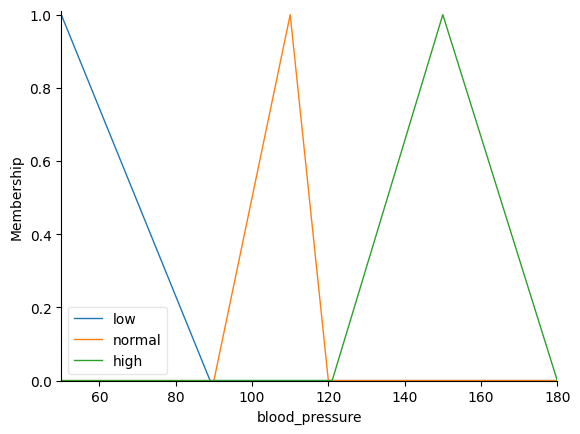

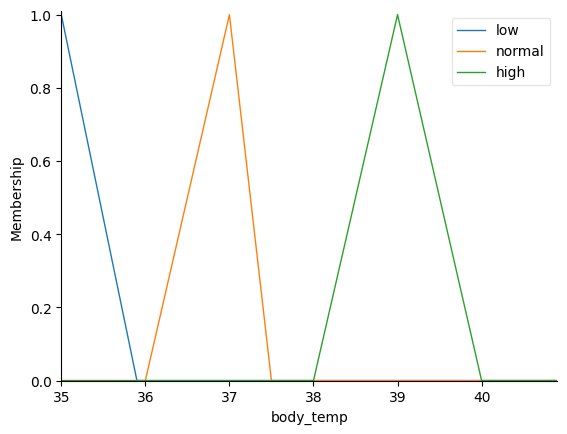

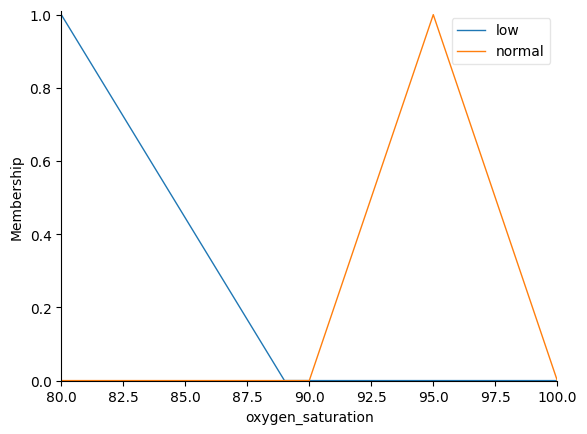

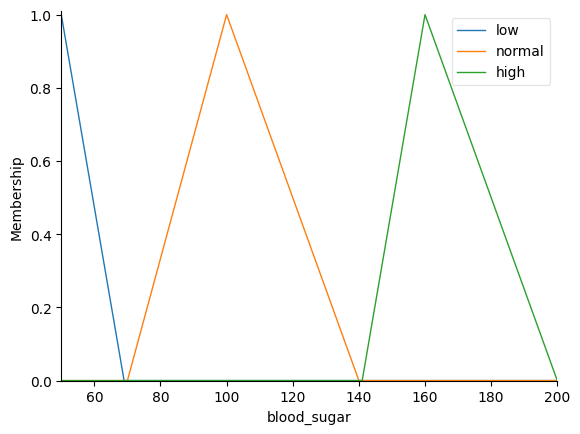

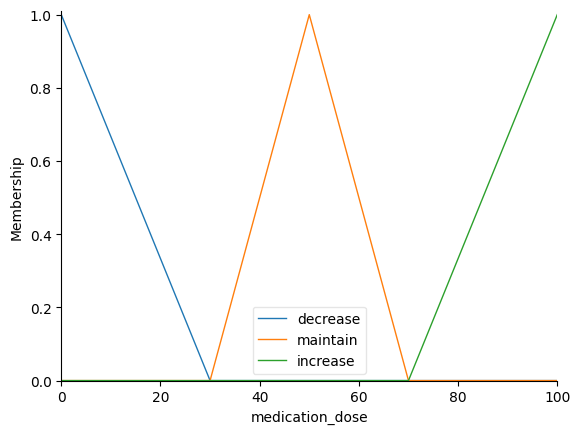

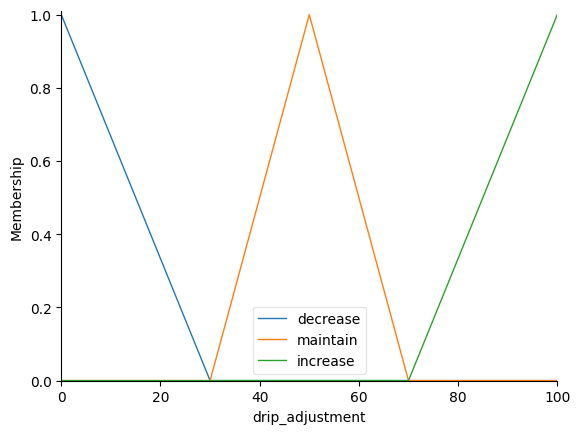

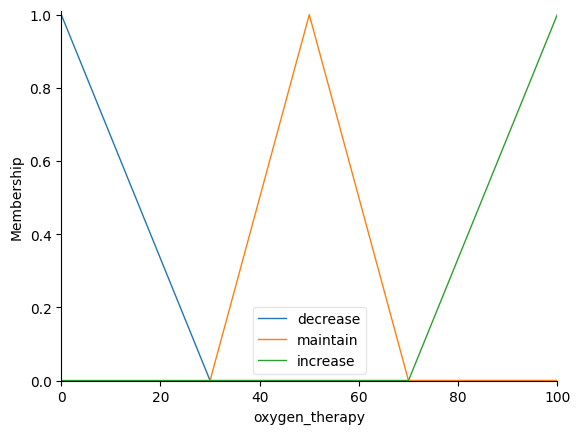

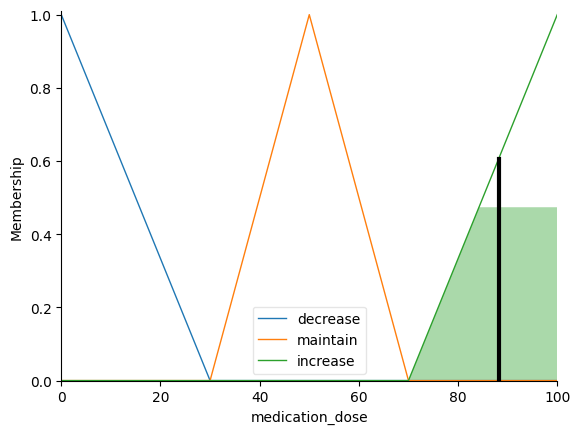

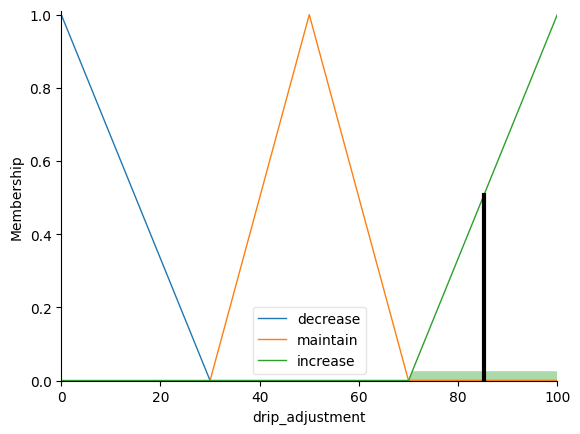

In [ ]:
#VD2.8
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

heart_rate = ctrl.Antecedent(np.arange(40, 181, 1), 'heart_rate')
blood_pressure = ctrl.Antecedent(np.arange(50, 181, 1), 'blood_pressure')
body_temp = ctrl.Antecedent(np.arange(35, 41, 0.1), 'body_temp')
oxygen_saturation = ctrl.Antecedent(np.arange(80, 101, 1), 'oxygen_saturation')
blood_sugar = ctrl.Antecedent(np.arange(50, 201, 1), 'blood_sugar')

medication_dose = ctrl.Consequent(np.arange(0, 101, 1), 'medication_dose')
drip_adjustment = ctrl.Consequent(np.arange(0, 101, 1), 'drip_adjustment')
oxygen_therapy = ctrl.Consequent(np.arange(0, 101, 1), 'oxygen_therapy')

heart_rate['low'] = fuzz.trimf(heart_rate.universe, [40, 40, 59])
heart_rate['normal'] = fuzz.trimf(heart_rate.universe, [60, 80, 100])
heart_rate['high'] = fuzz.trimf(heart_rate.universe, [101, 140, 180])

blood_pressure['low'] = fuzz.trimf(blood_pressure.universe, [50, 50, 89])
blood_pressure['normal'] = fuzz.trimf(blood_pressure.universe, [90, 110, 120])
blood_pressure['high'] = fuzz.trimf(blood_pressure.universe, [121, 150, 180])

body_temp['low'] = fuzz.trimf(body_temp.universe, [35, 35, 35.9])
body_temp['normal'] = fuzz.trimf(body_temp.universe, [36, 37, 37.5])
body_temp['high'] = fuzz.trimf(body_temp.universe, [38, 39, 40])

oxygen_saturation['low'] = fuzz.trimf(oxygen_saturation.universe, [80, 80, 89])
oxygen_saturation['normal'] = fuzz.trimf(oxygen_saturation.universe, [90, 95, 100])

blood_sugar['low'] = fuzz.trimf(blood_sugar.universe, [50, 50, 69])
blood_sugar['normal'] = fuzz.trimf(blood_sugar.universe, [70, 100, 140])
blood_sugar['high'] = fuzz.trimf(blood_sugar.universe, [141, 160, 200])

medication_dose['decrease'] = fuzz.trimf(medication_dose.universe, [0, 0, 30])
medication_dose['maintain'] = fuzz.trimf(medication_dose.universe, [30, 50, 70])
medication_dose['increase'] = fuzz.trimf(medication_dose.universe, [70, 100, 100])

drip_adjustment['decrease'] = fuzz.trimf(drip_adjustment.universe, [0, 0, 30])
drip_adjustment['maintain'] = fuzz.trimf(drip_adjustment.universe, [30, 50, 70])
drip_adjustment['increase'] = fuzz.trimf(drip_adjustment.universe, [70, 100, 100])

oxygen_therapy['decrease'] = fuzz.trimf(oxygen_therapy.universe, [0, 0, 30])
oxygen_therapy['maintain'] = fuzz.trimf(oxygen_therapy.universe, [30, 50, 70])
oxygen_therapy['increase'] = fuzz.trimf(oxygen_therapy.universe, [70, 100, 100])

heart_rate.view()
blood_pressure.view()
body_temp.view()
oxygen_saturation.view()
blood_sugar.view()
medication_dose.view()
drip_adjustment.view()
oxygen_therapy.view()


rule1 = ctrl.Rule(heart_rate['low'] & blood_pressure['low'], drip_adjustment['increase'])
rule2 = ctrl.Rule(heart_rate['high'] & blood_pressure['high'], medication_dose['decrease'])
rule3 = ctrl.Rule(body_temp['high'] & oxygen_saturation['low'], oxygen_therapy['increase'])
rule4 = ctrl.Rule(blood_sugar['high'], medication_dose['increase'])
rule5 = ctrl.Rule(blood_sugar['low'], medication_dose['decrease'])
rule6 = ctrl.Rule(oxygen_saturation['low'], oxygen_therapy['increase'])
rule7 = ctrl.Rule(blood_pressure['high'] & blood_sugar['high'] & heart_rate['high'], medication_dose['decrease'])
rule8 = ctrl.Rule(blood_pressure['low'] & oxygen_saturation['low'] & heart_rate['low'], drip_adjustment['increase'])
rule9 = ctrl.Rule(blood_pressure['low'] & oxygen_saturation['low'] & heart_rate['low'], oxygen_therapy['increase'])



patient_monitoring_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8,rule9])
patient_monitoring = ctrl.ControlSystemSimulation(patient_monitoring_ctrl)


patient_monitoring.input['heart_rate'] = 55
patient_monitoring.input['blood_pressure'] = 88
patient_monitoring.input['body_temp'] = 38.5
patient_monitoring.input['oxygen_saturation'] = 88
patient_monitoring.input['blood_sugar'] = 150
patient_monitoring.compute()
print(patient_monitoring.output['medication_dose'])
print(patient_monitoring.output['drip_adjustment'])
print(patient_monitoring.output['oxygen_therapy'])

medication_dose.view(sim=patient_monitoring)
drip_adjustment.view(sim=patient_monitoring)



0.8833333333333333


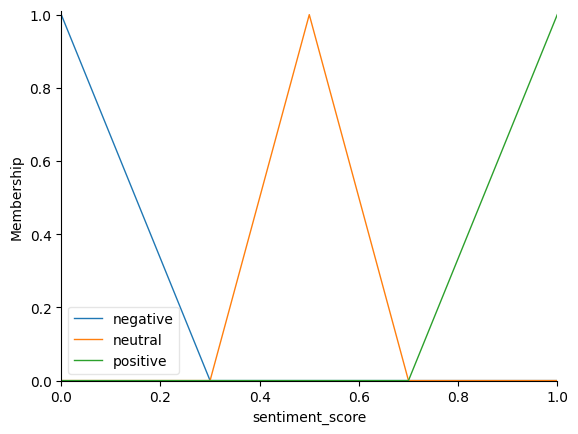

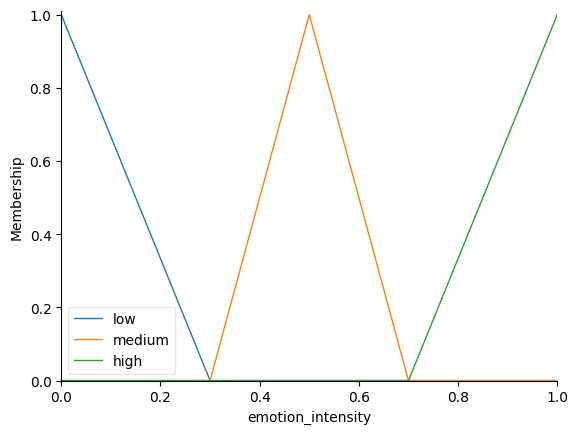

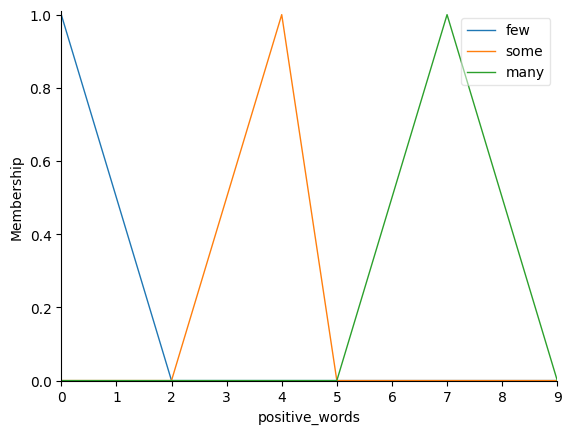

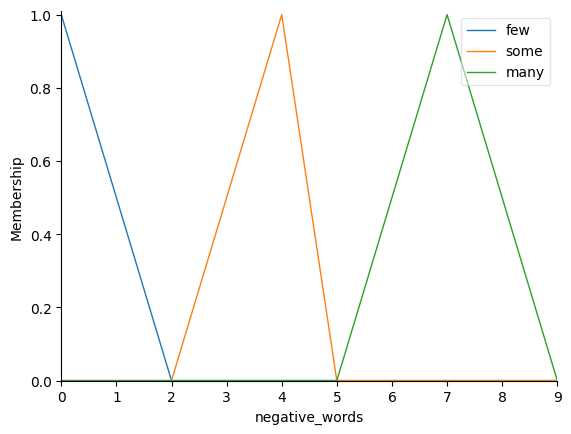

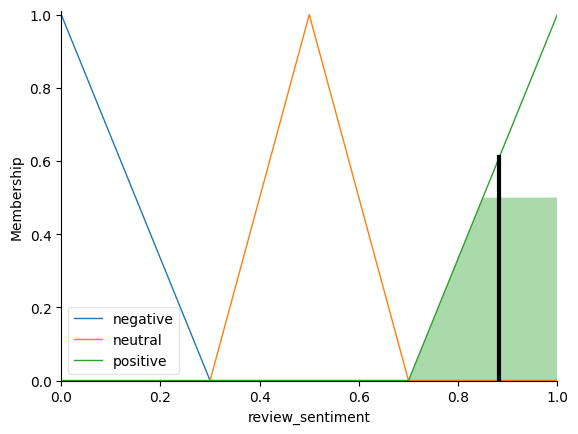

In [ ]:
#VD2.9
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

sentiment_score = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'sentiment_score')
emotion_intensity = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'emotion_intensity')
positive_words = ctrl.Antecedent(np.arange(0, 10, 1), 'positive_words')
negative_words = ctrl.Antecedent(np.arange(0, 10, 1), 'negative_words')

review_sentiment = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'review_sentiment')

sentiment_score['negative'] = fuzz.trimf(sentiment_score.universe, [0, 0, 0.3])
sentiment_score['neutral'] = fuzz.trimf(sentiment_score.universe, [0.3, 0.5, 0.7])
sentiment_score['positive'] = fuzz.trimf(sentiment_score.universe, [0.7, 1, 1])

emotion_intensity['low'] = fuzz.trimf(emotion_intensity.universe, [0, 0, 0.3])
emotion_intensity['medium'] = fuzz.trimf(emotion_intensity.universe, [0.3, 0.5, 0.7])
emotion_intensity['high'] = fuzz.trimf(emotion_intensity.universe, [0.7, 1, 1])

positive_words['few'] = fuzz.trimf(positive_words.universe, [0, 0, 2])
positive_words['some'] = fuzz.trimf(positive_words.universe, [2, 4, 5])
positive_words['many'] = fuzz.trimf(positive_words.universe, [5, 7, 9])

negative_words['few'] = fuzz.trimf(negative_words.universe, [0, 0, 2])
negative_words['some'] = fuzz.trimf(negative_words.universe, [2, 4, 5])
negative_words['many'] = fuzz.trimf(negative_words.universe, [5, 7, 9])

review_sentiment['negative'] = fuzz.trimf(review_sentiment.universe, [0, 0, 0.3])
review_sentiment['neutral'] = fuzz.trimf(review_sentiment.universe, [0.3, 0.5, 0.7])
review_sentiment['positive'] = fuzz.trimf(review_sentiment.universe, [0.7, 1, 1])

sentiment_score.view()
emotion_intensity.view()
positive_words.view()
negative_words.view()


rule1 = ctrl.Rule(sentiment_score['negative'] & emotion_intensity['high'], review_sentiment['negative'])
rule2 = ctrl.Rule(sentiment_score['negative'] & emotion_intensity['low'], review_sentiment['neutral'])
rule3 = ctrl.Rule(sentiment_score['neutral'] & emotion_intensity['medium'], review_sentiment['neutral'])
rule4 = ctrl.Rule(sentiment_score['positive'] & emotion_intensity['high'], review_sentiment['positive'])
rule5 = ctrl.Rule(positive_words['many'] & negative_words['few'], review_sentiment['positive'])
rule6 = ctrl.Rule(positive_words['few'] & negative_words['many'], review_sentiment['negative'])
rule7 = ctrl.Rule(positive_words['some'] & negative_words['some'], review_sentiment['neutral'])
rule8 = ctrl.Rule(sentiment_score['negative'] & negative_words['many'] & emotion_intensity['high'], review_sentiment['negative'])
rule9 = ctrl.Rule(sentiment_score['neutral'] & emotion_intensity['medium'] & positive_words['some'], review_sentiment['neutral'])
rule10 = ctrl.Rule(sentiment_score['positive'] & positive_words['many'] & emotion_intensity['high'], review_sentiment['positive'])


feedback_analysis_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
feedback_analysis = ctrl.ControlSystemSimulation(feedback_analysis_ctrl)


feedback_analysis.input['sentiment_score'] = 0.8
feedback_analysis.input['emotion_intensity'] = 0.9
feedback_analysis.input['positive_words'] = 6
feedback_analysis.input['negative_words'] = 1

feedback_analysis.compute()
print(feedback_analysis.output['review_sentiment'])
review_sentiment.view(sim=feedback_analysis)




Thoi gian du kien: 19.999999999999996
Thuong: 50.00000000000002
Danh gia: 3.0359932088285233


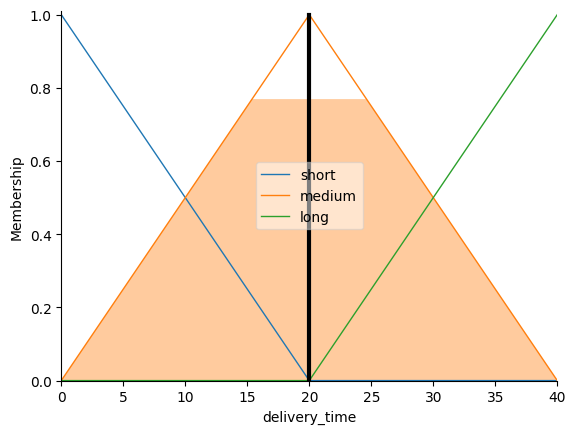

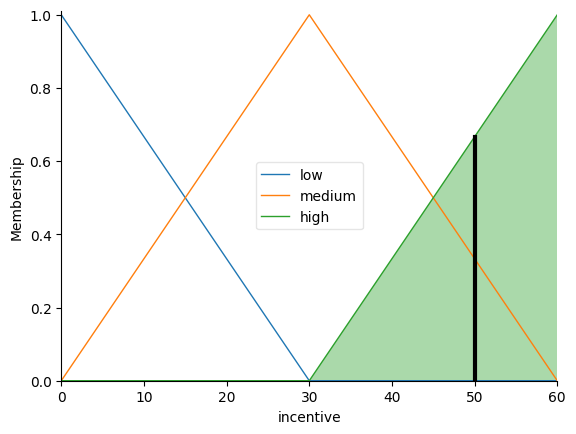

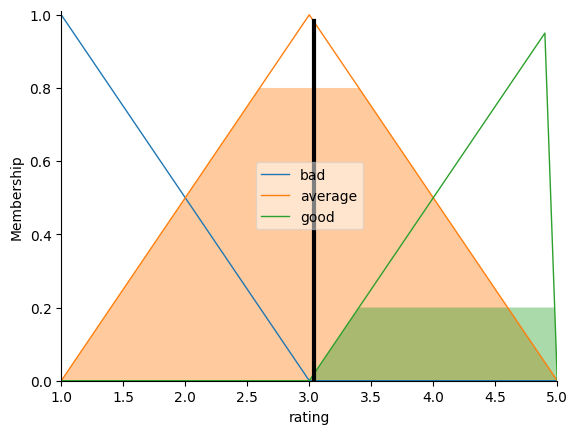

In [9]:
#VD2.10
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
traffic = ctrl.Antecedent(np.arange(0,10.1,0.1),'traffic')
distance = ctrl.Antecedent(np.arange(0,16.1,0.1),'distance')
weather = ctrl.Antecedent(np.arange(0,2.1,0.1),'weather')
order_preperation = ctrl.Antecedent(np.arange(0,25.1,0.1),'order_preperation')
fatigue = ctrl.Antecedent(np.arange(0,10.1,0.1),'fatigue')
delivery_time = ctrl.Consequent(np.arange(0,40.1,0.1),'delivery_time')
incentive = ctrl.Consequent(np.arange(0,60.1,0.1),'incentive')
rating = ctrl.Consequent(np.arange(1,5.1,0.1),'rating')

traffic['clear'] = fuzz.trimf(traffic.universe,[0,0,5])
traffic['medium'] = fuzz.trimf(traffic.universe,[0,5,10])
traffic['heavy'] = fuzz.trimf(traffic.universe,[5,10,10])
distance['short'] = fuzz.trimf(distance.universe,[0,0,8])
distance['medium'] = fuzz.trimf(distance.universe,[0,8,16])
distance['long'] = fuzz.trimf(distance.universe,[8,8,16])
weather['clear'] = fuzz.trimf(weather.universe,[0,0,1])
weather['rainy'] = fuzz.trimf(weather.universe,[0,1,2])
weather['stormy'] = fuzz.trimf(weather.universe,[1,2,2])
order_preperation['short'] = fuzz.trimf(order_preperation.universe,[0,0,13])
order_preperation['medium'] = fuzz.trimf(order_preperation.universe,[0,13,26])
order_preperation['long'] = fuzz.trimf(order_preperation.universe,[13,26,26])
fatigue['low'] = fuzz.trimf(fatigue.universe,[0,0,5])
fatigue['medium'] = fuzz.trimf(fatigue.universe,[0,5,10])
fatigue['high'] = fuzz.trimf(fatigue.universe,[5,10,10])
delivery_time['short'] = fuzz.trimf(delivery_time.universe,[0,0,20])
delivery_time['medium'] = fuzz.trimf(delivery_time.universe,[0,20,40])
delivery_time['long'] = fuzz.trimf(delivery_time.universe,[20,40,40])
incentive['low'] = fuzz.trimf(incentive.universe,[0,0,30])
incentive['medium'] = fuzz.trimf(incentive.universe,[0,30,60])
incentive['high'] = fuzz.trimf(incentive.universe,[30,60,60])
rating['bad'] = fuzz.trimf(rating.universe,[1,1,3])
rating['average'] = fuzz.trimf(rating.universe,[1,3,5])
rating['good'] = fuzz.trimf(rating.universe,[3,5,5])
rule1 = ctrl.Rule(traffic['clear']&distance['short'],delivery_time['short'])
rule2 = ctrl.Rule(traffic['medium']&distance['medium'],delivery_time['medium'])
rule3 = ctrl.Rule(traffic['heavy']&distance['long'],delivery_time['long'])
rule4 = ctrl.Rule(weather['clear'],incentive['low'])
rule5 = ctrl.Rule(weather['rainy'],incentive['medium'])
rule6 = ctrl.Rule(weather['stormy'],incentive['high'])
rule7 = ctrl.Rule(order_preperation['short']&traffic['clear'],delivery_time['short'])
rule8 = ctrl.Rule(order_preperation['medium']&traffic['medium'],delivery_time['medium'])
rule9 = ctrl.Rule(order_preperation['long']&traffic['heavy'],delivery_time['long'])
rule10 = ctrl.Rule(fatigue['low'],rating['good'])
rule11 = ctrl.Rule(fatigue['medium'],rating['average'])
rule12 = ctrl.Rule(fatigue['high'],rating['bad'])
rule13 = ctrl.Rule(distance['long']&weather['stormy']&traffic['heavy'],(delivery_time['long'],incentive['high']))
rule14 = ctrl.Rule(distance['short']&weather['clear']&traffic['clear'],(delivery_time['short'],incentive['low']))
rule15 = ctrl.Rule(fatigue['high']&traffic['heavy'],(rating['good'],delivery_time['long']))



fuzzy_system = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
sim = ctrl.ControlSystemSimulation(fuzzy_system)
sim.input['traffic']=5
sim.input['distance']=4
sim.input['weather']=2
sim.input['order_preperation']=10
sim.input['fatigue']=4
sim.compute()
print ("Thoi gian du kien:", sim.output['delivery_time'])
print ("Thuong:", sim.output['incentive'])
print ("Danh gia:", sim.output['rating'])
delivery_time.view(sim)
incentive.view(sim)
rating.view(sim)

Giá cuối cùng đề xuất: 8.18


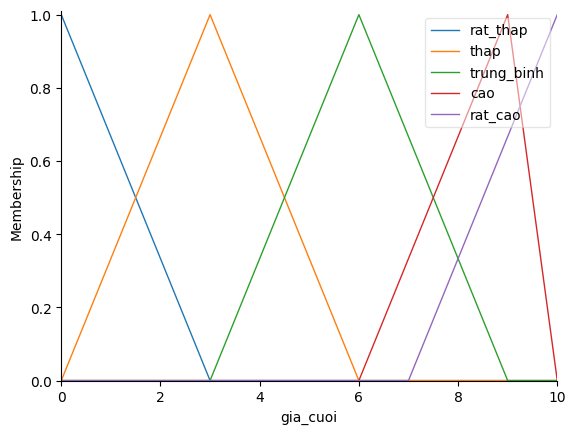

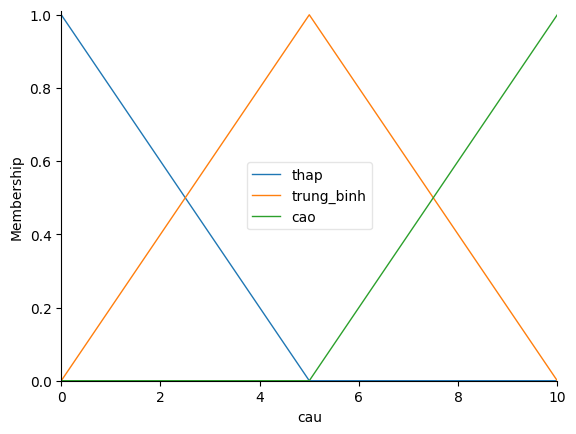

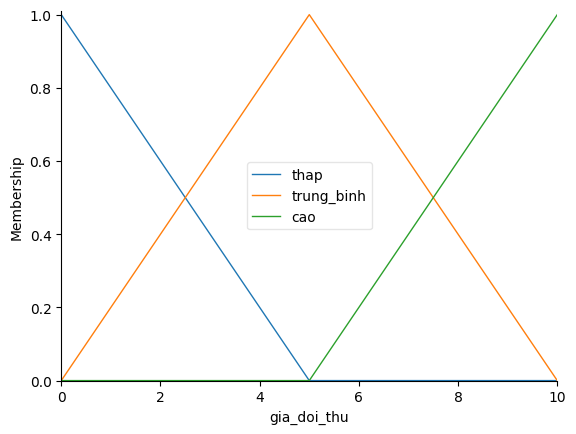

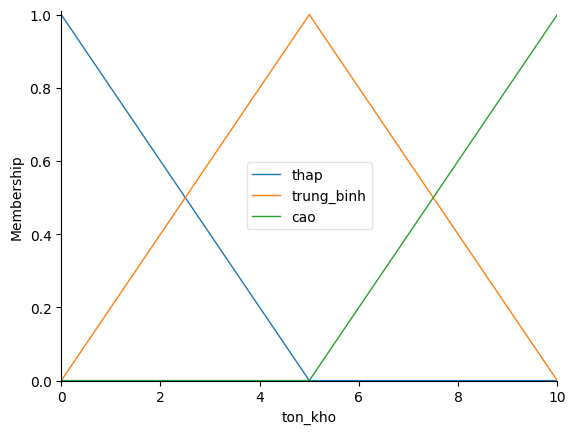

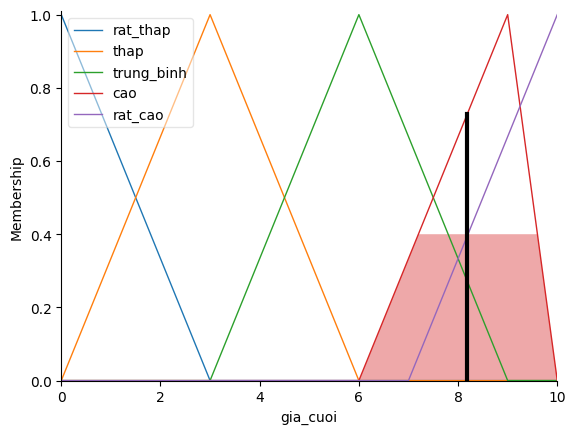

In [ ]:
#VD2.11
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

cau = ctrl.Antecedent(np.arange(0, 11, 1), 'cau')
gia_doi_thu = ctrl.Antecedent(np.arange(0, 11, 1), 'gia_doi_thu')
chi_phi = ctrl.Antecedent(np.arange(0, 11, 1), 'chi_phi')
mua = ctrl.Antecedent(np.arange(0, 11, 1), 'mua')
ton_kho = ctrl.Antecedent(np.arange(0, 11, 1), 'ton_kho')

gia_cuoi = ctrl.Consequent(np.arange(0, 11, 1), 'gia_cuoi')


cau['thap'] = fuzz.trimf(cau.universe, [0, 0, 5])
cau['trung_binh'] = fuzz.trimf(cau.universe, [0, 5, 10])
cau['cao'] = fuzz.trimf(cau.universe, [5, 10, 10])

gia_doi_thu['thap'] = fuzz.trimf(gia_doi_thu.universe, [0, 0, 5])
gia_doi_thu['trung_binh'] = fuzz.trimf(gia_doi_thu.universe, [0, 5, 10])
gia_doi_thu['cao'] = fuzz.trimf(gia_doi_thu.universe, [5, 10, 10])

ton_kho['thap'] = fuzz.trimf(ton_kho.universe, [0, 0, 5])
ton_kho['trung_binh'] = fuzz.trimf(ton_kho.universe, [0, 5, 10])
ton_kho['cao'] = fuzz.trimf(ton_kho.universe, [5, 10, 10])

gia_cuoi['rat_thap'] = fuzz.trimf(gia_cuoi.universe, [0, 0, 3])
gia_cuoi['thap'] = fuzz.trimf(gia_cuoi.universe, [0, 3, 6])
gia_cuoi['trung_binh'] = fuzz.trimf(gia_cuoi.universe, [3, 6, 9])
gia_cuoi['cao'] = fuzz.trimf(gia_cuoi.universe, [6, 9, 10])
gia_cuoi['rat_cao'] = fuzz.trimf(gia_cuoi.universe, [7, 10, 10])

gia_cuoi.view()
cau.view()
gia_doi_thu.view()
ton_kho.view()


rule1 = ctrl.Rule(cau['cao'] & gia_doi_thu['cao'] & ton_kho['thap'], gia_cuoi['rat_cao'])
rule2 = ctrl.Rule(cau['cao'] & gia_doi_thu['trung_binh'] & ton_kho['trung_binh'], gia_cuoi['cao'])
rule3 = ctrl.Rule(cau['trung_binh'] & gia_doi_thu['cao'] & ton_kho['trung_binh'], gia_cuoi['trung_binh'])
rule4 = ctrl.Rule(cau['thap'] & gia_doi_thu['thap'] & ton_kho['cao'], gia_cuoi['thap'])
rule5 = ctrl.Rule(cau['thap'] & gia_doi_thu['thap'] & ton_kho['cao'], gia_cuoi['rat_thap'])


pricing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
pricing_sim = ctrl.ControlSystemSimulation(pricing_ctrl)


pricing_sim.input['cau'] = 7
pricing_sim.input['gia_doi_thu'] = 5
pricing_sim.input['ton_kho'] = 3
pricing_sim.compute()

print(f"Giá cuối cùng đề xuất: {pricing_sim.output['gia_cuoi']:.2f}")

gia_cuoi.view(sim=pricing_sim)
